In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

from functools import reduce
from itertools import combinations

from scipy import stats

# configure pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Input: 0 or 1

In [2]:
home = 1
powerTrans = 0

In [3]:
if home:
    dpath = '/Users/cglab/projects/abcd/data/abcd5.1-rser/'
else:
    dpath = '/home/cglab/projects/abcd/data/abcd5.1-rser/'

In [4]:
# functions
def scale(vec):
    mu = np.mean(vec)
    sigma = np.std(vec)
    return (vec - mu) / sigma

### Get items reposnses for DERS subs in final sample size
* After cleaning other to be merged datasets

In [5]:
ders = pd.read_csv(dpath + 'abcd5.1_ders_item_scores_all.csv')
ders.eventname.value_counts()

eventname
3_year_follow_up_y_arm_1    10042
4_year_follow_up_y_arm_1     4666
Name: count, dtype: int64

In [6]:
# drop language select item
ders.drop(columns=['ders_p_select_language___1'], inplace=True)
# standardize items
num_cols = ders.select_dtypes(include=[np.number]).columns
stand_cols = ['S' + c for c in num_cols]
ders[stand_cols] = ders[num_cols].apply(scale)

In [7]:
# check ders df
print(ders.shape)
print(ders.eventname.value_counts())

(14708, 72)
eventname
3_year_follow_up_y_arm_1    10042
4_year_follow_up_y_arm_1     4666
Name: count, dtype: int64


In [8]:
ders.head()

,src_subject_id,eventname,ders_attn_awareness_p,ders_clear_feelings_p,ders_emotion_overwhelm_p,ders_feelings_attentive_p,ders_feelings_care_p,ders_feelings_know_p,ders_upset_ack_p,ders_upset_angry_p,ders_upset_ashamed_p,ders_upset_behavior_control_p,ders_upset_behavior_p,ders_upset_better_p,ders_upset_concentrate_p,ders_upset_control_p,ders_upset_depressed_p,ders_upset_difficulty_p,ders_upset_embarrassed_p,ders_upset_emotion_overwhelm_p,ders_upset_esteem_p,ders_upset_feel_better_p,ders_upset_fixation_p,ders_upset_focus_p,ders_upset_guilty_p,ders_upset_irritation_p,ders_upset_long_time_better_p,ders_upset_lose_control_p,ders_upset_out_control_p,ders_upset_time_p,ders_upset_weak_p,ders_total_score,ders_impulse_score,ders_nonaccept_score,ders_goals_score,ders_awareness_score,ders_aware_clar_score,Sders_attn_awareness_p,Sders_clear_feelings_p,Sders_emotion_overwhelm_p,Sders_feelings_attentive_p,Sders_feelings_care_p,Sders_feelings_know_p,Sders_upset_ack_p,Sders_upset_angry_p,Sders_upset_ashamed_p,Sders_upset_behavior_control_p,Sders_upset_behavior_p,Sders_upset_better_p,Sders_upset_concentrate_p,Sders_upset_control_p,Sders_upset_depressed_p,Sders_upset_difficulty_p,Sders_upset_embarrassed_p,Sders_upset_emotion_overwhelm_p,Sders_upset_esteem_p,Sders_upset_feel_better_p,Sders_upset_fixation_p,Sders_upset_focus_p,Sders_upset_guilty_p,Sders_upset_irritation_p,Sders_upset_long_time_better_p,Sders_upset_lose_control_p,Sders_upset_out_control_p,Sders_upset_time_p,Sders_upset_weak_p,Sders_total_score,Sders_impulse_score,Sders_nonaccept_score,Sders_goals_score,Sders_awareness_score,Sders_aware_clar_score
0,NDAR_INV003RTV85,3_year_follow_up_y_arm_1,-5,-5,1,-4,-5,-5,-5,1,1.0,-5.0,1.0,-5.0,1.0,1,1.0,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-18.0,4.0,6.0,3.0,-19,-34.0,0.044797,0.038876,-0.085989,0.071091,0.048974,0.042434,0.039778,-0.096555,-0.098513,0.080047,-0.082808,0.067169,-0.098128,-0.067902,-0.094560,-0.097891,-0.095448,-0.101899,-0.101021,-0.095836,-0.095117,-0.090944,-0.113449,-0.100099,-0.085735,-0.078835,-0.088997,-0.092084,-0.122545,-0.126522,-0.090471,-0.126011,-0.107147,0.062342,0.065161
1,NDAR_INV005V6D2C,3_year_follow_up_y_arm_1,-2,-2,1,-5,-5,-5,-5,5,1.0,-1.0,1.0,-1.0,1.0,1,1.0,3,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,13.0,5.0,-17,-25.0,0.102840,0.100772,-0.085989,0.054515,0.048974,0.042434,0.039778,-0.034983,-0.098513,0.130822,-0.082808,0.125366,-0.098128,-0.067902,-0.094560,-0.060379,-0.048822,-0.101899,-0.101021,-0.095836,-0.095117,-0.090944,-0.113449,-0.100099,-0.085735,-0.078835,-0.088997,-0.092084,-0.122545,-0.099256,-0.090471,-0.107184,-0.093402,0.073421,0.094559
2,NDAR_INV007W6H7B,3_year_follow_up_y_arm_1,-4,-4,2,-4,-5,-4,-3,1,1.0,-4.0,2.0,-4.0,1.0,2,2.0,2,1,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,-1.0,7.0,6.0,5.0,-16,-28.0,0.064145,0.059508,-0.067882,0.071091,0.048974,0.061779,0.079058,-0.096555,-0.098513,0.092741,-0.064070,0.081718,-0.098128,-0.045298,-0.080049,-0.079135,-0.095448,-0.087379,-0.101021,-0.080937,-0.078755,-0.071783,-0.113449,-0.100099,-0.085735,-0.078835,-0.072902,-0.092084,-0.122545,-0.105453,-0.074654,-0.126011,-0.093402,0.078961,0.084760
3,NDAR_INV007W6H7B,4_year_follow_up_y_arm_1,-5,-5,2,-5,-4,-4,-4,1,1.0,-5.0,1.0,-5.0,2.0,1,1.0,2,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-13.0,4.0,6.0,5.0,-18,-32.0,0.044797,0.038876,-0.067882,0.054515,0.067632,0.061779,0.059418,-0.096555,-0.098513,0.080047,-0.082808,0.067169,-0.080688,-0.067902,-0.094560,-0.079135,-0.095448,-0.101899,-0.101021,-0.095836,-0.095117,-0.090944,-0.113449,-0.100099,-0.085735,-0.078835,-0.088997,-0.092084,-0.122545,-0.120325,-0.090471,-0.126011,-0.093402,0.067882,0.071694
4,NDAR_INV00CY2MDM,3_year_follow_up_y_arm_1,-2,-2,2,-2,-2,-2,-2,1,1.0,-2.0,3.0,-2.0,3.0,3,1.0,3,1,2.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,1.0,24.0,10.0,6.0,9.0,-8,-14.0,0.102840,0.100772,-0.067882,0.104243,0.104949,0.100467,0.098699,-0.096555,-0.098513,0.118128,-0.045333,0.110816,-0.063249,-0.022695,-0.094560,-0.060379,-0

### Pivot table 
* pivot 'eventname' variable (3 year, 4 year) into columns, for merging with fmri data

In [9]:
# get item columns
cols_score = ders.drop(['src_subject_id', 'eventname'], axis=1).columns
ders_pivot = pd.pivot_table(ders, values=cols_score, columns='eventname', index='src_subject_id')
ders_pivot.head()

Sders_attn_awareness_p                            Sders_aware_clar_score                             Sders_awareness_score                            Sders_clear_feelings_p                          Sders_emotion_overwhelm_p                          Sders_feelings_attentive_p                             Sders_feelings_care_p                             Sders_feelings_know_p                                 Sders_goals_score                               Sders_impulse_score  \
eventname        3_year_follow_up_y_arm_1 4_year_follow_up_y_arm_1 3_year_follow_up_y_arm_1 4_year_follow_up_y_arm_1 3_year_follow_up_y_arm_1 4_year_follow_up_y_arm_1 3_year_follow_up_y_arm_1 4_year_follow_up_y_arm_1  3_year_follow_up_y_arm_1 4_year_follow_up_y_arm_1   3_year_follow_up_y_arm_1 4_year_follow_up_y_arm_1 3_year_follow_up_y_arm_1 4_year_follow_up_y_arm_1 3_year_follow_up_y_arm_1 4_year_follow_up_y_arm_1 3_year_follow_up_y_arm_1 4_year_follow_up_y_arm_1 3_year_follow_up_y_arm_1   
src_subject_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
NDAR_INV003RTV85                 0.044797                      NaN                 0.065161                      NaN                 0.062342                      NaN                 0.038876                      NaN                 -0.085989                      NaN                   0.071091                      NaN                 0.048974                      NaN                 0.042434                      NaN                -0.107147                      NaN                -0.090471   
NDAR_INV005V6D2C                 0.102840                      NaN                 0.094559                      NaN                 0.073421                      NaN                 0.100772                      NaN                 -0.085989                      NaN                   0.054515                      NaN                 0.048974                      NaN                 0.042434                      NaN                -0.093402                      NaN                -0.090471   
NDAR_INV007W6H7B                 0.064145                 0.044797                 0.084760                 0.071694                 0.078961                 0.067882                 0.059508                 0.038876                 -0.067882                -0.067882                   0.071091                 0.054515                 0.048974                 0.067632                 0.061779                 0.061779                -0.093402                -0.093402                -0.074654   
NDAR_INV00CY2MDM                 0.102840                 0.102840                 0.130491                 0.130491                 0.123276                 0.123276                 0.100772                 0.100772                 -0.067882                -0.085989                   0.104243                 0.104243                 0.104949                 0.104949                 0.100467                 0.100467                -0.065914                -0.052169                -0.058837   
NDAR_INV00HEV6HB                 0.064145                 0.064145                 0.084760                 0.084760                 0.078961                 0.078961                 0.059508                 0.059508                 -0.085989                -0.067882                   0.071091                 0.071091                 0.067632                 0.067632                 0.061779                 0.061779                -0.072786                -0.086530                -0.069382   

                                  

### Flatten multilevel index to single names for each column

In [10]:
ders_pivot.columns = [f"{x}_{y[:6]}" for x, y in ders_pivot.columns.to_flat_index()]
ders_pivot.head()

,Sders_attn_awareness_p_3_year,Sders_attn_awareness_p_4_year,Sders_aware_clar_score_3_year,Sders_aware_clar_score_4_year,Sders_awareness_score_3_year,Sders_awareness_score_4_year,Sders_clear_feelings_p_3_year,Sders_clear_feelings_p_4_year,Sders_emotion_overwhelm_p_3_year,Sders_emotion_overwhelm_p_4_year,Sders_feelings_attentive_p_3_year,Sders_feelings_attentive_p_4_year,Sders_feelings_care_p_3_year,Sders_feelings_care_p_4_year,Sders_feelings_know_p_3_year,Sders_feelings_know_p_4_year,Sders_goals_score_3_year,Sders_goals_score_4_year,Sders_impulse_score_3_year,Sders_impulse_score_4_year,Sders_nonaccept_score_3_year,Sders_nonaccept_score_4_year,Sders_total_score_3_year,Sders_total_score_4_year,Sders_upset_ack_p_3_year,Sders_upset_ack_p_4_year,Sders_upset_angry_p_3_year,Sders_upset_angry_p_4_year,Sders_upset_ashamed_p_3_year,Sders_upset_ashamed_p_4_year,Sders_upset_behavior_control_p_3_year,Sders_upset_behavior_control_p_4_year,Sders_upset_behavior_p_3_year,Sders_upset_behavior_p_4_year,Sders_upset_better_p_3_year,Sders_upset_better_p_4_year,Sders_upset_concentrate_p_3_year,Sders_upset_concentrate_p_4_year,Sders_upset_control_p_3_year,Sders_upset_control_p_4_year,Sders_upset_depressed_p_3_year,Sders_upset_depressed_p_4_year,Sders_upset_difficulty_p_3_year,Sders_upset_difficulty_p_4_year,Sders_upset_embarrassed_p_3_year,Sders_upset_embarrassed_p_4_year,Sders_upset_emotion_overwhelm_p_3_year,Sders_upset_emotion_overwhelm_p_4_year,Sders_upset_esteem_p_3_year,Sders_upset_esteem_p_4_year,Sders_upset_feel_better_p_3_year,Sders_upset_feel_better_p_4_year,Sders_upset_fixation_p_3_year,Sders_upset_fixation_p_4_year,Sders_upset_focus_p_3_year,Sders_upset_focus_p_4_year,Sders_upset_guilty_p_3_year,Sders_upset_guilty_p_4_year,Sders_upset_irritation_p_3_year,Sders_upset_irritation_p_4_year,Sders_upset_long_time_better_p_3_year,Sders_upset_long_time_better_p_4_year,Sders_upset_lose_control_p_3_year,Sders_upset_lose_control_p_4_year,Sders_upset_out_control_p_3_year,Sders_upset_out_control_p_4_year,Sders_upset_time_p_3_year,Sders_upset_time_p_4_year,Sders_upset_weak_p_3_year,Sders_upset_weak_p_4_year,ders_attn_awareness_p_3_year,ders_attn_awareness_p_4_year,ders_aware_clar_score_3_year,ders_aware_clar_score_4_year,ders_awareness_score_3_year,ders_awareness_score_4_year,ders_clear_feelings_p_3_year,ders_clear_feelings_p_4_year,ders_emotion_overwhelm_p_3_year,ders_emotion_overwhelm_p_4_year,ders_feelings_attentive_p_3_year,ders_feelings_attentive_p_4_year,ders_feelings_care_p_3_year,ders_feelings_care_p_4_year,ders_feelings_know_p_3_year,ders_feelings_know_p_4_year,ders_goals_score_3_year,ders_goals_score_4_year,ders_impulse_score_3_year,ders_impulse_score_4_year,ders_nonaccept_score_3_year,ders_nonaccept_score_4_year,ders_total_score_3_year,ders_total_score_4_year,ders_upset_ack_p_3_year,ders_upset_ack_p_4_year,ders_upset_angry_p_3_year,ders_upset_angry_p_4_year,ders_upset_ashamed_p_3_year,ders_upset_ashamed_p_4_year,ders_upset_behavior_control_p_3_year,ders_upset_behavior_control_p_4_year,ders_upset_behavior_p_3_year,ders_upset_behavior_p_4_year,ders_upset_better_p_3_year,ders_upset_better_p_4_year,ders_upset_concentrate_p_3_year,ders_upset_concentrate_p_4_year,ders_upset_control_p_3_year,ders_upset_control_p_4_year,ders_upset_depressed_p_3_year,ders_upset_depressed_p_4_year,ders_upset_difficulty_p_3_year,ders_upset_difficulty_p_4_year,ders_upset_embarrassed_p_3_year,ders_upset_embarrassed_p_4_year,ders_upset_emotion_overwhelm_p_3_year,ders_upset_emotion_overwhelm_p_4_year,ders_upset_esteem_p_3_year,ders_upset_esteem_p_4_year,ders_upset_feel_better_p_3_year,ders_upset_feel_better_p_4_year,ders_upset_fixation_p_3_year,ders_upset_fixation_p_4_year,ders_upset_focus_p_3_year,ders_upset_focus_p_4_year,ders_upset_guilty_p_3_year,ders_upset_guilty_p_4_year,ders_upset_irritation_p_3_year,ders_upset_irritation_p_4_year,ders_upset_long_time_better_p_3_year,ders_upset_long_time_better_p_4_year,ders_upset_lose_control_p_3_year,ders_upset_lose_control_p_4_ye

### Rename columns from year to wave, eg. T7

In [11]:
# get 3yr and 4yr columns
year3_cols = [c for c in ders_pivot.columns if '3_year' in c]
year4_cols = [c for c in ders_pivot.columns if '4_year' in c]
# split on '_' and get the first 4 elements
t7cols = ['_'.join(c.split('_')[:4]+['7']) for c in year3_cols]
t9cols = ['_'.join(c.split('_')[:4]+['9']) for c in year4_cols]
# zip them together in dictionary
yr_t7 = dict(zip(year3_cols, t7cols))
yr_t9 = dict(zip(year4_cols, t9cols))
# rename
ders_pivot.rename(yr_t7, axis=1, inplace=True)
ders_pivot.rename(yr_t9, axis=1, inplace=True)

In [12]:
print(ders_pivot.shape)
ders_pivot.head()

(10146, 140)


,Sders_attn_awareness_p_7,Sders_attn_awareness_p_9,Sders_aware_clar_score_7,Sders_aware_clar_score_9,Sders_awareness_score_3_7,Sders_awareness_score_4_9,Sders_clear_feelings_p_7,Sders_clear_feelings_p_9,Sders_emotion_overwhelm_p_7,Sders_emotion_overwhelm_p_9,Sders_feelings_attentive_p_7,Sders_feelings_attentive_p_9,Sders_feelings_care_p_7,Sders_feelings_care_p_9,Sders_feelings_know_p_7,Sders_feelings_know_p_9,Sders_goals_score_3_7,Sders_goals_score_4_9,Sders_impulse_score_3_7,Sders_impulse_score_4_9,Sders_nonaccept_score_3_7,Sders_nonaccept_score_4_9,Sders_total_score_3_7,Sders_total_score_4_9,Sders_upset_ack_p_7,Sders_upset_ack_p_9,Sders_upset_angry_p_7,Sders_upset_angry_p_9,Sders_upset_ashamed_p_7,Sders_upset_ashamed_p_9,Sders_upset_behavior_control_7,Sders_upset_behavior_control_9,Sders_upset_behavior_p_7,Sders_upset_behavior_p_9,Sders_upset_better_p_7,Sders_upset_better_p_9,Sders_upset_concentrate_p_7,Sders_upset_concentrate_p_9,Sders_upset_control_p_7,Sders_upset_control_p_9,Sders_upset_depressed_p_7,Sders_upset_depressed_p_9,Sders_upset_difficulty_p_7,Sders_upset_difficulty_p_9,Sders_upset_embarrassed_p_7,Sders_upset_embarrassed_p_9,Sders_upset_emotion_overwhelm_7,Sders_upset_emotion_overwhelm_9,Sders_upset_esteem_p_7,Sders_upset_esteem_p_9,Sders_upset_feel_better_7,Sders_upset_feel_better_9,Sders_upset_fixation_p_7,Sders_upset_fixation_p_9,Sders_upset_focus_p_7,Sders_upset_focus_p_9,Sders_upset_guilty_p_7,Sders_upset_guilty_p_9,Sders_upset_irritation_p_7,Sders_upset_irritation_p_9,Sders_upset_long_time_7,Sders_upset_long_time_9,Sders_upset_lose_control_7,Sders_upset_lose_control_9,Sders_upset_out_control_7,Sders_upset_out_control_9,Sders_upset_time_p_7,Sders_upset_time_p_9,Sders_upset_weak_p_7,Sders_upset_weak_p_9,ders_attn_awareness_p_7,ders_attn_awareness_p_9,ders_aware_clar_score_7,ders_aware_clar_score_9,ders_awareness_score_3_7,ders_awareness_score_4_9,ders_clear_feelings_p_7,ders_clear_feelings_p_9,ders_emotion_overwhelm_p_7,ders_emotion_overwhelm_p_9,ders_feelings_attentive_p_7,ders_feelings_attentive_p_9,ders_feelings_care_p_7,ders_feelings_care_p_9,ders_feelings_know_p_7,ders_feelings_know_p_9,ders_goals_score_3_7,ders_goals_score_4_9,ders_impulse_score_3_7,ders_impulse_score_4_9,ders_nonaccept_score_3_7,ders_nonaccept_score_4_9,ders_total_score_3_7,ders_total_score_4_9,ders_upset_ack_p_7,ders_upset_ack_p_9,ders_upset_angry_p_7,ders_upset_angry_p_9,ders_upset_ashamed_p_7,ders_upset_ashamed_p_9,ders_upset_behavior_control_7,ders_upset_behavior_control_9,ders_upset_behavior_p_7,ders_upset_behavior_p_9,ders_upset_better_p_7,ders_upset_better_p_9,ders_upset_concentrate_p_7,ders_upset_concentrate_p_9,ders_upset_control_p_7,ders_upset_control_p_9,ders_upset_depressed_p_7,ders_upset_depressed_p_9,ders_upset_difficulty_p_7,ders_upset_difficulty_p_9,ders_upset_embarrassed_p_7,ders_upset_embarrassed_p_9,ders_upset_emotion_overwhelm_7,ders_upset_emotion_overwhelm_9,ders_upset_esteem_p_7,ders_upset_esteem_p_9,ders_upset_feel_better_7,ders_upset_feel_better_9,ders_upset_fixation_p_7,ders_upset_fixation_p_9,ders_upset_focus_p_7,ders_upset_focus_p_9,ders_upset_guilty_p_7,ders_upset_guilty_p_9,ders_upset_irritation_p_7,ders_upset_irritation_p_9,ders_upset_long_time_7,ders_upset_long_time_9,ders_upset_lose_control_7,ders_upset_lose_control_9,ders_upset_out_control_7,ders_upset_out_control_9,ders_upset_time_p_7,ders_upset_time_p_9,ders_upset_weak_p_7,ders_upset_weak_p_9
src_subject_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NDAR_INV003RTV85,0.044797,NaN,0.065161,NaN,0.062342,NaN,0.038876,NaN,-0.085989,NaN,0.071091,NaN,0.048974,NaN,0.042434,NaN,-0.107147,NaN,-0.090471,NaN,-0.126011,NaN,-0.126522,NaN,0.039778,NaN,-0.096555,NaN,-0.098513,NaN,0.080047,NaN,-0.082808,NaN,0.067169,NaN,-0.098128,NaN,-0.067902,NaN,-0.094560,NaN,-0.097891,NaN,-0.095448,NaN,-0.101899,NaN,-0.101021,NaN,-0.095836,NaN,-0.095117,NaN,-0.090944,NaN,-0.113449,NaN,-

#### Merge ders_pivot with overall dataframe

In [13]:
# load merged cleaned dataset for RSER CFA
if powerTrans:
    cfa = pd.read_csv(dpath + 'abcd5.1_rtmri_2b_epn_cort_subc_net_df_urg_dep.csv', low_memory=False)
else:
    cfa = pd.read_csv(dpath + 'abcd5.1_rtmri_2b_epn_cort_subc_net_df_urg_dep.csv', low_memory=False)
print(cfa.shape)

(38815, 369)


In [14]:
cfa['eventname'].value_counts()

eventname
baseline_year_1_arm_1       11868
1_year_follow_up_y_arm_1    11220
2_year_follow_up_y_arm_1    10973
4_year_follow_up_y_arm_1     4754
Name: count, dtype: int64

In [15]:
comb = cfa.merge(ders_pivot, how='left', on=['src_subject_id'])
comb.shape

(38815, 509)

In [16]:
comb['eventname'].value_counts()

eventname
baseline_year_1_arm_1       11868
1_year_follow_up_y_arm_1    11220
2_year_follow_up_y_arm_1    10973
4_year_follow_up_y_arm_1     4754
Name: count, dtype: int64

In [17]:
[c for c in comb.columns if 'ders' in c]

['Sders_attn_awareness_p_7',
 'Sders_attn_awareness_p_9',
 'Sders_aware_clar_score_7',
 'Sders_aware_clar_score_9',
 'Sders_awareness_score_3_7',
 'Sders_awareness_score_4_9',
 'Sders_clear_feelings_p_7',
 'Sders_clear_feelings_p_9',
 'Sders_emotion_overwhelm_p_7',
 'Sders_emotion_overwhelm_p_9',
 'Sders_feelings_attentive_p_7',
 'Sders_feelings_attentive_p_9',
 'Sders_feelings_care_p_7',
 'Sders_feelings_care_p_9',
 'Sders_feelings_know_p_7',
 'Sders_feelings_know_p_9',
 'Sders_goals_score_3_7',
 'Sders_goals_score_4_9',
 'Sders_impulse_score_3_7',
 'Sders_impulse_score_4_9',
 'Sders_nonaccept_score_3_7',
 'Sders_nonaccept_score_4_9',
 'Sders_total_score_3_7',
 'Sders_total_score_4_9',
 'Sders_upset_ack_p_7',
 'Sders_upset_ack_p_9',
 'Sders_upset_angry_p_7',
 'Sders_upset_angry_p_9',
 'Sders_upset_ashamed_p_7',
 'Sders_upset_ashamed_p_9',
 'Sders_upset_behavior_control_7',
 'Sders_upset_behavior_control_9',
 'Sders_upset_behavior_p_7',
 'Sders_upset_behavior_p_9',
 'Sders_upset_better

## Load and merge Demographic data

In [18]:
demo = pd.read_csv(dpath + 'abcd_y_lt.csv')
print(demo.shape)
demo.head()

(90312, 10)


/tmp/ipykernel_327632/1536123419.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  demo = pd.read_csv(dpath + 'abcd_y_lt.csv')


,src_subject_id,eventname,site_id_l,rel_family_id,rel_birth_id,school_id,district_id,interview_date,interview_age,visit_type
0,NDAR_INV003RTV85,baseline_year_1_arm_1,site06,8781.0,87811.0,NaN,NaN,10/01/2018,131.0,1.0
1,NDAR_INV003RTV85,6_month_follow_up_arm_1,site06,NaN,NaN,NaN,NaN,03/06/2019,136.0,2.0
2,NDAR_INV003RTV85,1_year_follow_up_y_arm_1,site06,NaN,NaN,NaN,NaN,09/16/2019,143.0,1.0
3,NDAR_INV003RTV85,18_month_follow_up_arm_1,site06,NaN,NaN,NaN,NaN,02/18/2020,148.0,2.0
4,NDAR_INV003RTV85,2_year_follow_up_y_arm_1,site06,NaN,NaN,NaN,NaN,12/01/2020,157.0,2.0


### find which column has mixed data types

In [19]:
# weird = (demo.map(type) != demo.iloc[0].apply(type)).any(axis=1)
# demo[weird]

In [20]:
demo.dtypes

src_subject_id     object
eventname          object
site_id_l          object
rel_family_id     float64
rel_birth_id       object
school_id         float64
district_id       float64
interview_date     object
interview_age     float64
visit_type        float64
dtype: object

### it appears to be rel_birth_id, as it is labeled as an object but it has float values too
* we're not using the variable so can be dropped

In [21]:
keepc = ['src_subject_id', 'eventname', 'rel_family_id', 'interview_age']
dropc = [c for c in demo.columns if c not in keepc]
demo.drop(columns=dropc, inplace=True)
print(demo.shape)

(90312, 4)


In [22]:
# merge with overall df
print(comb.shape)
comb = comb.merge(demo, how='left', on=['src_subject_id', 'eventname'])#left_index=True, right_index=True)
print(comb.shape)
comb['eventname'].value_counts()

(38815, 509)
(38815, 511)


eventname
baseline_year_1_arm_1       11868
1_year_follow_up_y_arm_1    11220
2_year_follow_up_y_arm_1    10973
4_year_follow_up_y_arm_1     4754
Name: count, dtype: int64

## Load & Merge: SES and perceived support Latent factors

In [23]:
ses = pd.read_csv(dpath + 'abcd_y_lf.csv')
print(ses.shape)
ses.eventname.value_counts()

(8151, 5)


eventname
baseline_year_1_arm_1    8151
Name: count, dtype: int64

In [24]:
ses.columns

Index(['src_subject_id', 'eventname', 'latent_factor_ss_general_ses', 'latent_factor_ss_social', 'latent_factor_ss_perinatal'], dtype='object')

In [25]:
# merge
print(comb.shape)
comb = comb.merge(ses, how='left', on=['src_subject_id', 'eventname'])
print(comb.shape)
comb.eventname.value_counts()

(38815, 511)
(38815, 514)


eventname
baseline_year_1_arm_1       11868
1_year_follow_up_y_arm_1    11220
2_year_follow_up_y_arm_1    10973
4_year_follow_up_y_arm_1     4754
Name: count, dtype: int64

## Load & Merge: Income, Gender, Race, and Parent edcuation data
* in Parent completed Demographic data

In [26]:
demp = pd.read_csv(dpath + 'abcd_p_demo.csv')
print(demp.shape)
demp.head()

(48807, 276)


,src_subject_id,eventname,demoi_p_select_language___1,demo_prim,demo_brthdat_v2,demo_ed_v2,demo_adopt_agex_v2,demo_adopt_agex_v2_bl_dk,demo_sex_v2,demo_gender_id_v2,demo_race_a_p___10,demo_race_a_p___11,demo_race_a_p___12,demo_race_a_p___13,demo_race_a_p___14,demo_race_a_p___15,demo_race_a_p___16,demo_race_a_p___17,demo_race_a_p___18,demo_race_a_p___19,demo_race_a_p___20,demo_race_a_p___21,demo_race_a_p___22,demo_race_a_p___23,demo_race_a_p___24,demo_race_a_p___25,demo_race_a_p___77,demo_race_a_p___99,demo_ethn_v2,demo_ethn2_v2,demo_origin_v2,demo_years_us_v2,demo_years_us_v2_dk,demo_relig_v2,demo_prnt_age_v2,demo_prnt_age_v2_bl_refuse,demo_prnt_gender_id_v2,demo_prnt_race_a_v2___10,demo_prnt_race_a_v2___11,demo_prnt_race_a_v2___12,demo_prnt_race_a_v2___13,demo_prnt_race_a_v2___14,demo_prnt_race_a_v2___15,demo_prnt_race_a_v2___16,demo_prnt_race_a_v2___17,demo_prnt_race_a_v2___18,demo_prnt_race_a_v2___19,demo_prnt_race_a_v2___20,demo_prnt_race_a_v2___21,demo_prnt_race_a_v2___22,demo_prnt_race_a_v2___23,demo_prnt_race_a_v2___24,demo_prnt_race_a_v2___25,demo_prnt_race_a_v2___77,demo_prnt_race_a_v2___99,naas_id,naas_mom_id,naas_id_dad,naas_birthplace,naas_raised,naas_comm_contact,naas_pride,naas_self_rating,naas_traditions,demo_prnt_ethn_v2,demo_prnt_ethn2_v2,demo_prnt_16,demo_prnt_16a,demo_prnt_origin_v2,demo_biofather_v2,demo_biomother_v2,demo_matgrandm_v2,demo_matgrandf_v2,demo_patgrandm_v2,demo_patgrandf_v2,demo_prnt_years_us_v2,demo_prnt_years_us_v2_dk,demo_prnt_marital_v2,demo_prnt_ed_v2,demo_prnt_empl_v2,demo_prnt_empl_time,demo_prnt_income_v2,demo_prnt_prtnr_v2,demo_prnt_prtnr_bio,demo_prnt_prtnr_adopt,demo_prtnr_ed_v2,demo_prtnr_empl_v2,demo_prtnr_empl_time,demo_prtnr_income_v2,demo_comb_income_v2,demo_fam_exp1_v2,demo_fam_exp2_v2,demo_fam_exp3_v2,demo_fam_exp4_v2,demo_fam_exp5_v2,demo_fam_exp6_v2,demo_fam_exp7_v2,demo_roster_v2,demo_roster_v2_refuse,fam_roster_2c_v2,...,demo_prnt_prtnr_adopt_l,demo_prtnr_ed_v2_l,demo_prtnr_empl_v2_l,demo_prtnr_empl_time_l,demo_prtnr_indust_refuse_l,demo_prtnr_income_v2_l,demo_child_time_v2_l,demo_child_time2_v2_l,demo_child_time2_v2_dk_l,demo_child_time3_v2_l,demo_comb_income_v2_l,demo_roster_v2_l,demo_roster_v2_refuse_l,fam_roster_2c_v2_l,fam_roster_3c_v2_l,fam_roster_4c_v2_l,fam_roster_5c_v2_l,fam_roster_6c_v2_l,fam_roster_7c_v2_l,fam_roster_8c_v2_l,fam_roster_9c_v2_l,fam_roster_10c_v2_l,fam_roster_11c_v2_l,fam_roster_12c_v2_l,fam_roster_13c_v2_l,fam_roster_14c_v2_l,fam_roster_15c_v2_l,demo_fam_exp1_v2_l,demo_fam_exp2_v2_l,demo_fam_exp3_v2_l,demo_fam_exp4_v2_l,demo_fam_exp5_v2_l,demo_fam_exp6_v2_l,demo_fam_exp7_v2_l,demo_yrs_1_l,demo_yrs_2_l,demo_yrs_2a_l,demo_yrs_2b_l,demo_yrs_2_no_display_l___1,demo_med_insur_f_p,demo_med_insur_g_p,demo_med_insur_h_p,demo_prnt_race_acs_p__10,demo_prnt_race_acs_p__11,demo_prnt_race_acs_p__12,demo_prnt_race_acs_p__13,demo_prnt_race_acs_p__14,demo_prnt_race_acs_p__15,demo_prnt_race_acs_p__16,demo_prnt_race_acs_p__17,demo_prnt_race_acs_p__18,demo_prnt_race_acs_p__19,demo_prnt_race_acs_p__20,demo_prnt_race_acs_p__21,demo_prnt_race_acs_p__22,demo_prnt_race_acs_p__23,demo_prnt_race_acs_p__24,demo_prnt_race_acs_p__777,demo_prnt_race_acs_p__999,demo_prnt_ed_v2_2yr_l,demo_prnt_ethnic_acs_p,demo_prtnr_ed_v2_2yr_l,demo_med_insur_a_p,demo_med_insur_b_p,demo_med_insur_c_p,demo_med_insur_d_p,demo_med_insur_e_p,demo_nat_lang_3_yrs_eng_p___7,demo_nat_lang_3_yrs_eng_p___8,demo_nat_lang_3_yrs_eng_p___9,demo_nat_lang_3_yrs_eng_p___10,demo_nat_lang_3_yrs_eng_p___11,demo_nat_lang_3_yrs_eng_p___12,demo_nat_lang_3_yrs_eng_p___13,demo_nat_lang_3_yrs_eng_p___14,demo_nat_lang_3_yrs_other_p__0,demo_nat_lang_3_yrs_other_p__1,demo_nat_lang_3_yrs_other_p__2,demo_nat_lang_3_yrs_other_p__3,demo_nat_lang_3_yrs_other_p__4,demo_nat_lang_3_yrs_other_p__5,demo_nat_lang_3_yrs_other_p__6,demo_nat_lang_3_yrs_other_p__7,demo_nat_lang_3_yrs_other_p__8,demo_nat_lang_3_yrs_other_p__9,demo_nat_lang_3_yrs_other_p_10,demo_nat_lang_3_yrs_other_p_11,demo_nat_lang_3_yrs_eng_p___0,demo_nat_lang_3_yrs_

In [27]:
# collect column  names about income and gender and parents education
income = [c for c in demp.columns if 'income' in c]
gender = [c for c in demp.columns if 'gender' in c and 'prnt' not in c]
edu = [c for c in demp.columns if 'prnt_ed' in c]

In [28]:
demp[income]

,demo_prnt_income_v2,demo_prtnr_income_v2,demo_comb_income_v2,demo_prnt_income_v2_l,demo_prtnr_income_v2_l,demo_comb_income_v2_l
0,5.0,8.0,8.0,NaN,NaN,NaN
1,NaN,NaN,NaN,5.0,8.0,8.0
2,NaN,NaN,NaN,5.0,8.0,8.0
3,NaN,NaN,NaN,6.0,8.0,9.0
4,1.0,999.0,999.0,NaN,NaN,NaN
...,...,...,...,...,...,...
48802,777.0,7.0,7.0,NaN,NaN,NaN
48803,NaN,NaN,NaN,6.0,NaN,6.0
48804,NaN,NaN,NaN,6.0,NaN,6.0
48805,NaN,NaN,NaN,7.0,NaN,7.0


In [29]:
demp[edu+['eventname', 'src_subject_id']]

,demo_prnt_ed_v2,demo_prnt_ed_v2_l,demo_prnt_ed_v2_2yr_l,eventname,src_subject_id
0,13.0,NaN,NaN,baseline_year_1_arm_1,NDAR_INV003RTV85
1,NaN,13.0,NaN,1_year_follow_up_y_arm_1,NDAR_INV003RTV85
2,NaN,NaN,13.0,2_year_follow_up_y_arm_1,NDAR_INV003RTV85
3,NaN,NaN,13.0,3_year_follow_up_y_arm_1,NDAR_INV003RTV85
4,6.0,NaN,NaN,baseline_year_1_arm_1,NDAR_INV005V6D2C
...,...,...,...,...,...
48802,17.0,NaN,NaN,baseline_year_1_arm_1,NDAR_INVZZZP87KR
48803,NaN,17.0,NaN,1_year_follow_up_y_arm_1,NDAR_INVZZZP87KR
48804,NaN,NaN,16.0,2_year_follow_up_y_arm_1,NDAR_INVZZZP87KR
48805,NaN,NaN,17.0,3_year_follow_up_y_arm_1,NDAR_INVZZZP87KR


In [30]:
demp[gender]

,demo_gender_id_v2,demo_gender_id_v2_l
0,2.0,NaN
1,NaN,2.0
2,NaN,2.0
3,NaN,2.0
4,2.0,NaN
...,...,...
48802,2.0,NaN
48803,NaN,2.0
48804,NaN,2.0
48805,NaN,2.0


### Each of income, gender, and pedu have multiple columns with no overlap between them
* So we need to combine each of the income columns into one (same for gender and pedu)
* asign NaN's to blank then sum across columns
  
* Get Dummy column for gender for SEM and Machine learning
* 0-Female and 1-Male
* Drop Non-binary genders from baseline, since there are very few ~5 each

In [31]:
# ensure all columns are converted to numeric
demp[income + edu + gender] = demp[income + edu + gender].astype(float)

In [32]:
# combine the 2 demp income columns; they each have nan where the other has data
demp['income'] = demp[['demo_comb_income_v2', 'demo_comb_income_v2_l']].fillna(0).sum(axis=1)
# dempine the 3 pedu columns; they each have nan where the other has data
demp['pedu'] = demp[['demo_prnt_ed_v2', 'demo_prnt_ed_v2_l', 'demo_prnt_ed_v2_2yr_l']].fillna(0).sum(axis=1)
# dempine the 3 secondary parent edu columns; they each have nan where the other has data
demp['pedu2'] = demp[['demo_prtnr_ed_v2', 'demo_prtnr_ed_v2_l', 'demo_prtnr_ed_v2_2yr_l']].fillna(0).sum(axis=1)
# combine the 2 gender columns; they each have nan where the other has data
demp['gender'] = demp[['demo_gender_id_v2', 'demo_gender_id_v2_l']].fillna(0).sum(axis=1)
# comb[['eventname', 'demo_gender_id_v2', 'demo_gender_id_v2_l', 'gender']]

In [33]:
demp[income + edu + gender].head()

,demo_prnt_income_v2,demo_prtnr_income_v2,demo_comb_income_v2,demo_prnt_income_v2_l,demo_prtnr_income_v2_l,demo_comb_income_v2_l,demo_prnt_ed_v2,demo_prnt_ed_v2_l,demo_prnt_ed_v2_2yr_l,demo_gender_id_v2,demo_gender_id_v2_l
0,5.0,8.0,8.0,NaN,NaN,NaN,13.0,NaN,NaN,2.0,NaN
1,NaN,NaN,NaN,5.0,8.0,8.0,NaN,13.0,NaN,NaN,2.0
2,NaN,NaN,NaN,5.0,8.0,8.0,NaN,NaN,13.0,NaN,2.0
3,NaN,NaN,NaN,6.0,8.0,9.0,NaN,NaN,13.0,NaN,2.0
4,1.0,999.0,999.0,NaN,NaN,NaN,6.0,NaN,NaN,2.0,NaN


#### Select columns from demp to KEEP for merging

In [34]:
keepd = ['src_subject_id', 'eventname', 'race_ethnicity', 'acs_raked_propensity_score', 'income', 'pedu', 'pedu2', 'gender']
dropd = [c for c in demp.columns if c not in keepd]
demp.drop(columns=dropd, inplace=True)
demp.shape

(48807, 8)

### Get Dummy column for gender for SEM and Machine learning

* 0-Female and 1-Male
* Drop Non-binary genders from baseline, since there are very few ~5 each

In [35]:
demp['gender'].value_counts()

gender
1.0      25427
2.0      22890
5.0        115
6.0        101
999.0       86
3.0         73
0.0         49
4.0         38
777.0       28
Name: count, dtype: int64

### Merge demp with overall comb df

In [36]:
print(comb.shape)
comb = comb.merge(demp, on=['src_subject_id', 'eventname'], how='left')
comb.shape

(38815, 514)


(38815, 520)

In [37]:
# drop non-binary genders for current analysis
comb = comb[(comb['gender']==1) | (comb['gender']==2)]

In [38]:
comb['gender'].isnull().sum()

0

In [39]:
[c for c in comb.columns if 'gender' in c or 'SES' in c]

['gender']

In [40]:
comb['eventname'].value_counts()

eventname
baseline_year_1_arm_1       11843
1_year_follow_up_y_arm_1    11173
2_year_follow_up_y_arm_1    10823
4_year_follow_up_y_arm_1     4541
Name: count, dtype: int64

### Load and merge Threat items

In [41]:
threat = pd.read_csv(dpath + 'ABCD_FamCon_5.3.24.csv')
item_cols = [c for c in threat.columns if c.startswith('Fc') and '*' not in c]# and '7' not in c and '9' not in c]
threat.rename(columns={'subid': 'src_subject_id'}, inplace=True)
# Scale numeric items
numeric_cols = threat.select_dtypes(include=[np.number]).columns
stan_cols = ['S' + c for c in numeric_cols]
threat[stan_cols] = threat[numeric_cols].apply(scale)
threat.head()

,src_subject_id,ppensity,FconP1,FconP2,FconP3,FconP4,FconP5,FconP6,FconP7,FconP8,FconP9,Sppensity,SFconP1,SFconP2,SFconP3,SFconP4,SFconP5,SFconP6,SFconP7,SFconP8,SFconP9
0,NDAR_INV003RTV85,466.092707,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.641641,-0.445586,-1.007864,-0.383727,-1.036719,-0.697481,-0.373403,2.838522,-0.458691,1.02604
1,NDAR_INV005V6D2C,520.488325,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.486702,-0.445586,-1.007864,-0.383727,0.964582,-0.697481,-0.373403,-0.352296,-0.458691,-0.97462
2,NDAR_INV00BD7VDC,414.643009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.788189,-0.445586,0.992198,-0.383727,-1.036719,-0.697481,-0.373403,-0.352296,-0.458691,-0.97462
3,NDAR_INV00CY2MDM,1433.061575,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.112649,2.244238,0.992198,2.606020,0.964582,-0.697481,2.678070,2.838522,2.180116,1.02604
4,NDAR_INV00HEV6HB,650.876929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.115306,-0.445586,-1.007864,-0.383727,-1.036719,-0.697481,-0.373403,-0.352296,-0.458691,-0.97462


In [42]:
stan_cols

['Sppensity',
 'SFconP1',
 'SFconP2',
 'SFconP3',
 'SFconP4',
 'SFconP5',
 'SFconP6',
 'SFconP7',
 'SFconP8',
 'SFconP9']

In [43]:
# output = list(combinations(item_cols, 2))

# for tup in output:
#     threat['.'.join(tup)] = reduce(lambda a,b: a*b, [threat[i] for i in tup])
#     threat['.'.join(tup) + '_mc'] = threat['.'.join(tup)] - threat['.'.join(tup)].mean()

In [44]:
# prod_ind_all = list()
# for i in item_cols:
#     for j in item_cols:
#         prod_ind_all.append('.'.join([i, j]) + '.1')

In [45]:
threat.head()

,src_subject_id,ppensity,FconP1,FconP2,FconP3,FconP4,FconP5,FconP6,FconP7,FconP8,FconP9,Sppensity,SFconP1,SFconP2,SFconP3,SFconP4,SFconP5,SFconP6,SFconP7,SFconP8,SFconP9
0,NDAR_INV003RTV85,466.092707,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.641641,-0.445586,-1.007864,-0.383727,-1.036719,-0.697481,-0.373403,2.838522,-0.458691,1.02604
1,NDAR_INV005V6D2C,520.488325,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.486702,-0.445586,-1.007864,-0.383727,0.964582,-0.697481,-0.373403,-0.352296,-0.458691,-0.97462
2,NDAR_INV00BD7VDC,414.643009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.788189,-0.445586,0.992198,-0.383727,-1.036719,-0.697481,-0.373403,-0.352296,-0.458691,-0.97462
3,NDAR_INV00CY2MDM,1433.061575,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.112649,2.244238,0.992198,2.606020,0.964582,-0.697481,2.678070,2.838522,2.180116,1.02604
4,NDAR_INV00HEV6HB,650.876929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.115306,-0.445586,-1.007864,-0.383727,-1.036719,-0.697481,-0.373403,-0.352296,-0.458691,-0.97462


### Merge threat with full df

In [46]:
print(comb.shape)
combt = comb.merge(threat, how='left', on='src_subject_id')
print(combt.shape)

(38380, 520)
(38380, 540)


In [47]:
# check missing count for pedu, pedu2, income
combt.pedu.isnull().sum(), combt.pedu2.isnull().sum(), combt.income.isnull().sum(), combt.FconP1.isnull().sum()

(0, 0, 0, 5)

#### Check for missing in FAmily ID

In [48]:
combt[combt['eventname']=='baseline_year_1_arm_1']['rel_family_id'].isnull().sum(), combt['rel_family_id'].isnull().sum()

(0, 26537)

#### 0 baseline participants are missing family id
* so we can assign family id to other waves if needed

In [49]:
combt['gender'].isnull().sum()

0

In [50]:
combt['eventname'].value_counts()

eventname
baseline_year_1_arm_1       11843
1_year_follow_up_y_arm_1    11173
2_year_follow_up_y_arm_1    10823
4_year_follow_up_y_arm_1     4541
Name: count, dtype: int64

### Convert Gender dummy and relative family id to integer
* for model ingestion

In [51]:
combt['gender'] =  combt['gender'].astype(int)
# combt.dropna(subset='rel_family_id_yr1', inplace=True)
combt['rel_family_id'] =  combt['rel_family_id'].astype(float)
combt['gender'].dtype, combt['rel_family_id'].dtype

(dtype('int64'), dtype('float64'))

In [52]:
combt.shape

(38380, 540)

### Create  shorter names for SEM

In [53]:
# # categorical variables that should not be standardized
# cols_stry = ['src_subject_id', 'eventname', 'gender_cat', 'demo_gender_id_v2', 'demo_gender_id_v2_l', 'scanID', 'site_id_l', 'rel_family_id', 'rel_birth_id', 'school_id', 'district_id', 'interview_date', 'interview_age', 'visit_type']#, 'dersAWR_4_year_follow_up_y_arm_1', 'dersAWR_3_year_follow_up_y_arm_1']
# # collect various variable names for correlations and variance
# rs_var_nm = [c for c in combt.columns if 'var' in c or 'mrirsfd' in c]
# rs_cor_nm = [c for c in combt.columns if 'var' not in c and c not in cols_stry and c not in rs_var_nm]
# corr_cols = [c for c in combt.columns if '_cor_' in c or '_c_' in c]
# # columns for cfa's
# corr_cols_cfa = [c for c in corr_cols if '/' not in c]
# corr_cols_cfa += ['src_subject_id', 'newThrt', 'newThrt_sq', 'FamCon1', 'gender_dum', 'latent_factor_ss_general_ses', 'site_id_l', 'rel_family_id']
# sa_cols = [c for c in combt.columns if '_sa_' in c]
# mr_var = rs_var_nm + corr_cols

In [54]:
corr_cols = [c for c in combt.columns if '_cor_' in c or '_c_' in c]
# columns for cfa's
corr_cols_cfa = [c for c in corr_cols if '/' not in c]
corr_cols_cfa = [c for c in corr_cols_cfa if 'site_id_l' not in c]
# create shorter variable names for viewing in R
corr_cols_cfa_sn = ['_'.join(c.split('_')[-3:]) for c in corr_cols_cfa]
rcols = dict(zip(corr_cols_cfa, corr_cols_cfa_sn))
combt.rename(columns=rcols, inplace=True)

In [55]:
corr_cols_cfa_sn

['sa_ngd_ad',
 'sa_ngd_cgc',
 'sa_ngd_ca',
 'sa_ngd_dla',
 'sa_ngd_fo',
 'sa_ngd_n',
 'sa_ngd_rspltp',
 'sa_ngd_sa',
 'sa_ngd_smh',
 'sa_ngd_smm',
 'sa_ngd_vs',
 'dt_ngd_ad',
 'dt_ngd_cgc',
 'dt_ngd_ca',
 'dt_ngd_dt',
 'dt_ngd_dla',
 'dt_ngd_fo',
 'dt_ngd_n',
 'dt_ngd_rspltp',
 'dt_ngd_sa',
 'dt_ngd_smh',
 'dt_ngd_smm',
 'dt_ngd_vs',
 'smh_ngd_smh',
 'dla_ngd_dla',
 'vta_ngd_ad',
 'vta_ngd_cgc',
 'vta_ngd_ca',
 'vta_ngd_dt',
 'vta_ngd_dla',
 'vta_ngd_fo',
 'vta_ngd_n',
 'vta_ngd_rspltp',
 'vta_ngd_sa',
 'vta_ngd_smh',
 'vta_ngd_smm',
 'vta_ngd_vta',
 'vs_ngd_vta',
 'sa_scs_aalh',
 'sa_scs_aarh',
 'sa_scs_aglh',
 'sa_scs_agrh',
 'sa_scs_bs',
 'sa_scs_cdelh',
 'sa_scs_cderh',
 'sa_scs_crcxlh',
 'sa_scs_crcxrh',
 'sa_scs_hplh',
 'sa_scs_hprh',
 'sa_scs_pllh',
 'sa_scs_plrh',
 'sa_scs_ptlh',
 'sa_scs_ptrh',
 'sa_scs_thplh',
 'sa_scs_thprh',
 'sa_scs_vtdclh',
 'sa_scs_vtdcrh',
 'df_scs_aalh',
 'df_scs_aarh',
 'df_scs_aglh',
 'df_scs_agrh',
 'df_scs_bs',
 'df_scs_cdelh',
 'df_scs_cderh',
 'd

### Load and Merge Emotion Regulation Questionnaire

In [56]:
erq = pd.read_csv(dpath + 'abcd5.1_erq_scores.csv')
print(erq.shape)
erq.head()

(15032, 11)


,src_subject_id,eventname,erq_admin,erq_feelings_control,erq_feelings_happy,erq_feelings_hide,erq_feelings_less_bad,erq_feelings_self,erq_feelings_think,erq_reapp,erq_supp
0,NDAR_INV003RTV85,3_year_follow_up_y_arm_1,1.0,2,2,2,2,2,3,7.0,6.0
1,NDAR_INV005V6D2C,3_year_follow_up_y_arm_1,1.0,2,4,4,3,3,3,10.0,9.0
2,NDAR_INV007W6H7B,3_year_follow_up_y_arm_1,1.0,2,3,1,3,3,4,10.0,6.0
3,NDAR_INV007W6H7B,4_year_follow_up_y_arm_1,2.0,3,2,4,3,3,2,7.0,10.0
4,NDAR_INV00CY2MDM,3_year_follow_up_y_arm_1,1.0,3,4,3,4,2,4,12.0,8.0


In [57]:
erq['eventname'].value_counts()

eventname
3_year_follow_up_y_arm_1    10299
4_year_follow_up_y_arm_1     4733
Name: count, dtype: int64

In [58]:
### Pivot table 
# * pivot 'eventname' variable (3 year, 4 year) into columns, for merging with fmri data

# get item columns
cols_escore = erq.drop(['src_subject_id', 'eventname', 'erq_admin'], axis=1).columns
erq_pivot = pd.pivot_table(erq, values=cols_escore, columns='eventname', index='src_subject_id')
erq_pivot.head()

erq_feelings_control                                erq_feelings_happy                                 erq_feelings_hide                             erq_feelings_less_bad                                 erq_feelings_self                                erq_feelings_think                                         erq_reapp                                          erq_supp                         
eventname        3_year_follow_up_y_arm_1 4_year_follow_up_y_arm_1 3_year_follow_up_y_arm_1 4_year_follow_up_y_arm_1 3_year_follow_up_y_arm_1 4_year_follow_up_y_arm_1 3_year_follow_up_y_arm_1 4_year_follow_up_y_arm_1 3_year_follow_up_y_arm_1 4_year_follow_up_y_arm_1 3_year_follow_up_y_arm_1 4_year_follow_up_y_arm_1 3_year_follow_up_y_arm_1 4_year_follow_up_y_arm_1 3_year_follow_up_y_arm_1 4_year_follow_up_y_arm_1
src_subject_id                                                                                                                                                                                                                                                                                                                                                                                                                  
NDAR_INV003RTV85                      2.0                      NaN                      2.0                      NaN                      2.0                      NaN                      2.0                      NaN                      2.0                      NaN                      3.0                      NaN                      7.0                      NaN                      6.0                      NaN
NDAR_INV005V6D2C                      2.0                      NaN                      4.0                      NaN                      4.0                      NaN                      3.0                      NaN                      3.0                      NaN                      3.0                      NaN                     10.0                      NaN                      9.0                      NaN
NDAR_INV007W6H7B                      2.0                      3.0                      3.0                      2.0                      1.0                      4.0                      3.0                      3.0                      3.0                      3.0                      4.0                      2.0                     10.0                      7.0                      6.0                     10.0
NDAR_INV00CY2MDM                      3.0                      3.0                      4.0                      4.0                      3.0                      3.0                      4.0                      4.0                      2.0                      3.0                      4.0                      3.0                     12.0                     11.0                      8.0                      9.0
NDAR_INV00HEV6HB                      4.0                      1.0                      5.0                      5.0                      3.0                      2.0                      4.0                      3.0                      3.0                      3.0                      4.0                      4.0                     13.0                     12.0                     10.0                      6.0

In [59]:
### Flatten multilevel index to single names for each column
erq_pivot.columns = [f"{x}_{y[:6]}" for x, y in erq_pivot.columns.to_flat_index()]
erq_pivot.head()

,erq_feelings_control_3_year,erq_feelings_control_4_year,erq_feelings_happy_3_year,erq_feelings_happy_4_year,erq_feelings_hide_3_year,erq_feelings_hide_4_year,erq_feelings_less_bad_3_year,erq_feelings_less_bad_4_year,erq_feelings_self_3_year,erq_feelings_self_4_year,erq_feelings_think_3_year,erq_feelings_think_4_year,erq_reapp_3_year,erq_reapp_4_year,erq_supp_3_year,erq_supp_4_year
src_subject_id,,,,,,,,,,,,,,,,
NDAR_INV003RTV85,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,3.0,NaN,7.0,NaN,6.0,NaN
NDAR_INV005V6D2C,2.0,NaN,4.0,NaN,4.0,NaN,3.0,NaN,3.0,NaN,3.0,NaN,10.0,NaN,9.0,NaN
NDAR_INV007W6H7B,2.0,3.0,3.0,2.0,1.0,4.0,3.0,3.0,3.0,3.0,4.0,2.0,10.0,7.0,6.0,10.0
NDAR_INV00CY2MDM,3.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0,2.0,3.0,4.0,3.0,12.0,11.0,8.0,9.0
NDAR_INV00HEV6HB,4.0,1.0,5.0,5.0,3.0,2.0,4.0,3.0,3.0,3.0,4.0,4.0,13.0,12.0,10.0,6.0


In [60]:
### Rename columns from year to wave, eg. T7
# get 3yr and 4yr columns
year3_cols = [c for c in erq_pivot.columns if '3_year' in c]
year4_cols = [c for c in erq_pivot.columns if '4_year' in c]
# split on '_' and get the first 4 elements
t7cols = ['_'.join(c.split('_')[:3]+['7']) for c in year3_cols]
t9cols = ['_'.join(c.split('_')[:3]+['9']) for c in year4_cols]
# zip them together in dictionary
yr_t7 = dict(zip(year3_cols, t7cols))
yr_t9 = dict(zip(year4_cols, t9cols))
# rename
erq_pivot.rename(yr_t7, axis=1, inplace=True)
erq_pivot.rename(yr_t9, axis=1, inplace=True)

print(erq_pivot.shape)
erq_pivot.head()

(10364, 16)


,erq_feelings_control_7,erq_feelings_control_9,erq_feelings_happy_7,erq_feelings_happy_9,erq_feelings_hide_7,erq_feelings_hide_9,erq_feelings_less_7,erq_feelings_less_9,erq_feelings_self_7,erq_feelings_self_9,erq_feelings_think_7,erq_feelings_think_9,erq_reapp_3_7,erq_reapp_4_9,erq_supp_3_7,erq_supp_4_9
src_subject_id,,,,,,,,,,,,,,,,
NDAR_INV003RTV85,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,3.0,NaN,7.0,NaN,6.0,NaN
NDAR_INV005V6D2C,2.0,NaN,4.0,NaN,4.0,NaN,3.0,NaN,3.0,NaN,3.0,NaN,10.0,NaN,9.0,NaN
NDAR_INV007W6H7B,2.0,3.0,3.0,2.0,1.0,4.0,3.0,3.0,3.0,3.0,4.0,2.0,10.0,7.0,6.0,10.0
NDAR_INV00CY2MDM,3.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0,2.0,3.0,4.0,3.0,12.0,11.0,8.0,9.0
NDAR_INV00HEV6HB,4.0,1.0,5.0,5.0,3.0,2.0,4.0,3.0,3.0,3.0,4.0,4.0,13.0,12.0,10.0,6.0


In [61]:
print(combt.shape)
combt = combt.merge(erq_pivot, how='left', on='src_subject_id')
combt.shape

(38380, 540)


(38380, 556)

In [62]:
combt['eventname'].value_counts()

eventname
baseline_year_1_arm_1       11843
1_year_follow_up_y_arm_1    11173
2_year_follow_up_y_arm_1    10823
4_year_follow_up_y_arm_1     4541
Name: count, dtype: int64

### Convert scanID string to 33 unique float numbers

In [63]:
combt['mri_info_deviceserialnumber'].nunique()

32

In [64]:
combt['mri_info_deviceserialnumber'].unique()

array(['HASH96a0c182', 'HASHe3ce02d3', 'HASH48f7cbc3', 'HASH65b39280',
       'HASHd422be27', 'HASHe4f6957a', 'HASHdb2589d4', 'HASH5b0cf1bb',
       'HASH03db707f', 'HASH4b0b8b05', 'HASHfeb7e81a', 'HASH11ad4ed5',
       'HASH5ac2b20b', 'HASH3935c89e', 'HASHd7cb4c6d', 'HASH1314a204',
       'HASH311170b9', 'HASH6b4422a7', 'HASHc3bf3d9c', '000000000UM750MR',
       'HASH69f406fa', 'HASHc9398971', 'HASH4d1ed7b1', 'HASH5b2fcf80',
       'HASH7911780b', 'HASHa3e45734', 'TBC_UWM', 'HASH4036a433',
       'HASHb640a1b8', 'HASH31ce566d', 'HASH7f91147d', 'HASHe76e6d72',
       nan], dtype=object)

In [65]:
unique_vals = combt['mri_info_deviceserialnumber'].unique()
combt['mri_info_deviceserialnumber'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))),
           inplace=True)
combt['mri_info_deviceserialnumber'].dtype

dtype('float64')

### Include participants who passed Qaulity Control in ABCD preprocessing
* 'imgincl_rsfmri_include' & 'imgincl_nback_include' are provided by ABCD
* after preprocessing, raters assessed images and those receiving a 0 in these variables,
* had extremely noisey, unrecoverable data
* 1- data to include; 0- unusable
* 0 in either warrants exclusion

In [66]:
[c for c in combt.columns if 'include' in c]

['imgincl_rsfmri_include', 'imgincl_nback_include']

In [67]:
combt[combt['imgincl_rsfmri_include'].isnull()].head()

,sa_ngd_ad,sa_ngd_cgc,sa_ngd_ca,sa_ngd_dla,sa_ngd_fo,sa_ngd_n,sa_ngd_rspltp,sa_ngd_sa,sa_ngd_smh,sa_ngd_smm,sa_ngd_vs,dt_ngd_ad,dt_ngd_cgc,dt_ngd_ca,dt_ngd_dt,dt_ngd_dla,dt_ngd_fo,dt_ngd_n,dt_ngd_rspltp,dt_ngd_sa,dt_ngd_smh,dt_ngd_smm,dt_ngd_vs,smh_ngd_smh,dla_ngd_dla,vta_ngd_ad,vta_ngd_cgc,vta_ngd_ca,vta_ngd_dt,vta_ngd_dla,vta_ngd_fo,vta_ngd_n,vta_ngd_rspltp,vta_ngd_sa,vta_ngd_smh,vta_ngd_smm,vta_ngd_vta,vs_ngd_vta,src_subject_id,eventname,sa_scs_aalh,sa_scs_aarh,sa_scs_aglh,sa_scs_agrh,sa_scs_bs,sa_scs_cdelh,sa_scs_cderh,sa_scs_crcxlh,sa_scs_crcxrh,sa_scs_hplh,sa_scs_hprh,sa_scs_pllh,sa_scs_plrh,sa_scs_ptlh,sa_scs_ptrh,sa_scs_thplh,sa_scs_thprh,sa_scs_vtdclh,sa_scs_vtdcrh,df_scs_aalh,df_scs_aarh,df_scs_aglh,df_scs_agrh,df_scs_bs,df_scs_cdelh,df_scs_cderh,df_scs_crcxlh,df_scs_crcxrh,df_scs_hplh,df_scs_hprh,df_scs_pllh,df_scs_plrh,df_scs_ptlh,df_scs_ptrh,df_scs_thplh,df_scs_thprh,df_scs_vtdclh,df_scs_vtdcrh,vta_scs_aalh,vta_scs_aarh,vta_scs_aglh,vta_scs_agrh,vta_scs_cdelh,vta_scs_cderh,vta_scs_crcxlh,vta_scs_crcxrh,vta_scs_hplh,vta_scs_hprh,vta_scs_pllh,vta_scs_plrh,vta_scs_ptlh,vta_scs_ptrh,vta_scs_thplh,vta_scs_thprh,vta_scs_vtdclh,vta_scs_vtdcrh,dsa_scs_aalh,dsa_scs_aarh,dsa_scs_aglh,dsa_scs_agrh,...,ders_goals_score_4_9,ders_impulse_score_3_7,ders_impulse_score_4_9,ders_nonaccept_score_3_7,ders_nonaccept_score_4_9,ders_total_score_3_7,ders_total_score_4_9,ders_upset_ack_p_7,ders_upset_ack_p_9,ders_upset_angry_p_7,ders_upset_angry_p_9,ders_upset_ashamed_p_7,ders_upset_ashamed_p_9,ders_upset_behavior_control_7,ders_upset_behavior_control_9,ders_upset_behavior_p_7,ders_upset_behavior_p_9,ders_upset_better_p_7,ders_upset_better_p_9,ders_upset_concentrate_p_7,ders_upset_concentrate_p_9,ders_upset_control_p_7,ders_upset_control_p_9,ders_upset_depressed_p_7,ders_upset_depressed_p_9,ders_upset_difficulty_p_7,ders_upset_difficulty_p_9,ders_upset_embarrassed_p_7,ders_upset_embarrassed_p_9,ders_upset_emotion_overwhelm_7,ders_upset_emotion_overwhelm_9,ders_upset_esteem_p_7,ders_upset_esteem_p_9,ders_upset_feel_better_7,ders_upset_feel_better_9,ders_upset_fixation_p_7,ders_upset_fixation_p_9,ders_upset_focus_p_7,ders_upset_focus_p_9,ders_upset_guilty_p_7,ders_upset_guilty_p_9,ders_upset_irritation_p_7,ders_upset_irritation_p_9,ders_upset_long_time_7,ders_upset_long_time_9,ders_upset_lose_control_7,ders_upset_lose_control_9,ders_upset_out_control_7,ders_upset_out_control_9,ders_upset_time_p_7,ders_upset_time_p_9,ders_upset_weak_p_7,ders_upset_weak_p_9,rel_family_id,interview_age,latent_factor_ss_general_ses,latent_factor_ss_social,latent_factor_ss_perinatal,race_ethnicity,acs_raked_propensity_score,income,pedu,pedu2,gender,ppensity,FconP1,FconP2,FconP3,FconP4,FconP5,FconP6,FconP7,FconP8,FconP9,Sppensity,SFconP1,SFconP2,SFconP3,SFconP4,SFconP5,SFconP6,SFconP7,SFconP8,SFconP9,erq_feelings_control_7,erq_feelings_control_9,erq_feelings_happy_7,erq_feelings_happy_9,erq_feelings_hide_7,erq_feelings_hide_9,erq_feelings_less_7,erq_feelings_less_9,erq_feelings_self_7,erq_feelings_self_9,erq_feelings_think_7,erq_feelings_think_9,erq_reapp_3_7,erq_reapp_4_9,erq_supp_3_7,erq_supp_4_9
22039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NDAR_INV0CTJAAHC,4_year_follow_up_y_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,5.0,5.0,10.0,9.0,6.0,3.0,-4.0,-4.0,2.0,2.0,2.0,1.0,-1.0,-2.0,1.0,2.0,-3.0,-4.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,165.0,NaN,NaN,NaN,NaN,NaN,9.0,16.0,16.0,1,311.639922,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.081581,-0.445586,0.992198,-0.383727,0.964582,-0.697481,-0.373403,-0.352296,-0.458691,1.02604,2.0,2.0,4.0,3.0,4.0,4.0,2.0,4

Any missing in 'imgincl_rsfmri_inlcude' also is missing rsMR, so safe to drop

In [68]:
'en-back: {0} subs failed enback tfmri Image Qaulity Control'.format((combt['imgincl_nback_include']==0).sum())

'en-back: 6216 subs failed enback tfmri Image Qaulity Control'

In [69]:
'resting: {} subs failed enback tfmri Image Qaulity Control'.format((combt['imgincl_rsfmri_include']==0).sum())

'resting: 3755 subs failed enback tfmri Image Qaulity Control'

### Drop bad RESTING state scans
* only drop from MRI waves: ['baseline_year_1_arm_1', '2_year_follow_up_y_arm_1', '4_year_follow_up_y_arm_1']
* and ensure we retain non-MRI waves (which wouldnt have a 1 in the imgincl variable
    * this part of the code does that: (~combt['eventname'].isin(mr_waves))
* we'll assign NaN to the bad tfmri scans

In [70]:
# mr_waves = ['baseline_year_1_arm_1', '2_year_follow_up_y_arm_1', '4_year_follow_up_y_arm_1']
# negcol = [c for c in combt.columns if c.startswith('tf')]
# combt.loc[(combt['eventname'].isin(mr_waves) & combt['imgincl_rsfmri_include']==1), negcol].head(200)# | (~combt['eventname'].isin(mr_waves))]

In [71]:
# mr_waves = ['baseline_year_1_arm_1', '2_year_follow_up_y_arm_1', '4_year_follow_up_y_arm_1']
# negcol = [c for c in combt.columns if c.startswith('tf')]
# combt.loc[(combt['eventname'].isin(mr_waves) & combt['imgincl_nback_include']==1), negcol].head(200)# | (~combt['eventname'].isin(mr_waves))]

In [72]:
mr_waves = ['baseline_year_1_arm_1', '2_year_follow_up_y_arm_1', '4_year_follow_up_y_arm_1']
print(combt.shape)
combt = combt[(combt['eventname'].isin(mr_waves) & combt['imgincl_rsfmri_include']==1) | (~combt['eventname'].isin(mr_waves)) | (combt['eventname'].isin(mr_waves) & combt['imgincl_nback_include']==1)]
combt.shape

(38380, 556)


(30999, 556)

In [73]:
combt['eventname'].value_counts()

eventname
1_year_follow_up_y_arm_1    11173
baseline_year_1_arm_1        9932
2_year_follow_up_y_arm_1     7154
4_year_follow_up_y_arm_1     2740
Name: count, dtype: int64

#### Get task frmi nback variables

In [74]:
# update this when other tasks or task variables for tfmri
nb_tfmri = [c for c in combt.columns if c.startswith('tf')]
print(len(nb_tfmri))

218


### Didn't work as expected. hold off for now, will remove later. NaN bad task EN-BACK scans

In [75]:
# rather than dropping at this point and losing other data
# set the BAD NBack scans to NaN
# combt.loc[(combt['eventname'].isin(mr_waves) & combt['imgincl_nback_include']==1), nb_tfmri] = np.nan

In [76]:
combt[combt['eventname']=='baseline_year_1_arm_1'].shape

(9932, 556)

In [77]:
combt['eventname'].value_counts()

eventname
1_year_follow_up_y_arm_1    11173
baseline_year_1_arm_1        9932
2_year_follow_up_y_arm_1     7154
4_year_follow_up_y_arm_1     2740
Name: count, dtype: int64

### Rename cols to include wave (3) & merge Yr1 variables (neighborhood here) that aren't null and from yr1

In [78]:
yr1_vars = [v for v in combt.columns if 'adi' in v or 'opat_kfrpp' in v or 'neigh' in v]
yr1_vars += ['src_subject_id']
df1 = combt.loc[combt['eventname']=='1_year_follow_up_y_arm_1', yr1_vars].copy()

In [79]:
df1 = df1.dropna(axis=1, how='all')
print(df1.shape)
df1.head()

(11173, 4)


,neighborhood1r_p,neighborhood2r_p,neighborhood3r_p,src_subject_id
27207,5.0,5.0,4.0,NDAR_INV003RTV85
27208,1.0,4.0,3.0,NDAR_INV005V6D2C
27209,5.0,5.0,4.0,NDAR_INV00BD7VDC
27210,2.0,3.0,2.0,NDAR_INV00CY2MDM
27211,4.0,2.0,3.0,NDAR_INV00HEV6HB


In [80]:
### Rename columns from year to wave, eg. T7
# get 3yr and 4yr columns
year1_cols = [c for c in df1.columns if 'subject' not in c]
# split on '_' and get the first 4 elements
t3cols = ['_'.join(c.split('_')[:3]+['3']) for c in year1_cols]
# zip them together in dictionary
yr_t3 = dict(zip(year1_cols, t3cols))
# rename
df1.rename(yr_t3, axis=1, inplace=True)
df1.columns

Index(['neighborhood1r_p_3', 'neighborhood2r_p_3', 'neighborhood3r_p_3', 'src_subject_id'], dtype='object')

In [81]:
# drop year1 from the combined datafraame, since we have yr1 in df1 and will merge
combt = combt[~(combt['eventname']=='1_year_follow_up_y_arm_1')] # select all rows except year1 followup
print(combt.shape)
combt = combt.merge(df1, how='left', on='src_subject_id')
combt.shape

(19826, 556)


(19826, 559)

In [82]:
combt['eventname'].value_counts()

eventname
baseline_year_1_arm_1       9932
2_year_follow_up_y_arm_1    7154
4_year_follow_up_y_arm_1    2740
Name: count, dtype: int64

### Rename variables of INterest in SEM

#### Dictionary for renaming columns

In [95]:
redict = {
    'src_subject_id': 'subID',
    'rel_family_id': 'famID',
    'mri_info_deviceserialnumber': 'scanID',
    'rsfmri_meanmotion': 'Motrs',
    'tfmri_nback_all_meanmotion': 'Motnb',
    'ders_aware_clar_score': 'AwareER',
    'acs_raked_propensity_score': 'prpensit',
    'latent_factor_ss_general_ses': 'SES',
    'reshist_addr1_adi_unemp': 'ADI1', 
    'reshist_addr1_adi_edu_l': 'ADI2', 
    'reshist_addr1_adi_crowd': 'ADI3', 
    'reshist_addr1_adi_pov': 'ADI4',
    'reshist_addr1_opat_kfrpp_avg': 'SocMob',
    'demo_prnt_ed_v2': 'peduh1',
    'demo_prtnr_ed_v2': 'peduh2',
    'neighborhood1r_p': 'neigh1',
    'neighborhood2r_p': 'neigh2',
    'neighborhood3r_p': 'neigh3',
    'neighborhood1r_p_3': 'neigh13',
    'neighborhood2r_p_3': 'neigh23',
    'neighborhood3r_p_3': 'neigh33',
    'src_subject_id': 'subID',
         
     # Negative vs Neutral Face n-back
     'tfmri_nback_all_224': 'nAmygL',
     'tfmri_nback_all_238': 'nAmygR',
     'tfmri_nback_all_223': 'nHipcL',
     'tfmri_nback_all_237': 'nHipcR',
     'tfmri_nback_all_226': 'nNAL',
     'tfmri_nback_all_239': 'nNAR',
     'tfmri_nback_all_218': 'nPutmL',
     'tfmri_nback_all_235': 'nPutmR',
     'tfmri_nback_all_217': 'nCaudtL',
     'tfmri_nback_all_234': 'nCaudtR',
     'tfmri_nback_all_227': 'nVntdcL',
     'tfmri_nback_all_240': 'nVntdcR',
     'tfmri_nback_all_216': 'nThalL',
     'tfmri_nback_all_233': 'nThalR',
     'tfmri_nback_all_804': 'nPreCunL',
     'tfmri_nback_all_770': 'nPreCunR',
     'tfmri_nback_all_749': 'ncMdFrL',
     'tfmri_nback_all_783': 'ncMdFrR',
     'tfmri_nback_all_761': 'nParHipL',
     'tfmri_nback_all_795': 'nParHipR',
     'tfmri_nback_all_751': 'nEntornL',
     'tfmri_nback_all_785': 'nEntornR',
     'tfmri_nback_all_757': 'nLtOrFrL',
     'tfmri_nback_all_791': 'nLtOrbFrR',
     'tfmri_nback_all_759': 'nMedOrFrL',
     'tfmri_nback_all_793': 'nMedOrFrR',
     'tfmri_nback_all_772': 'nrMidFrL',
     'tfmri_nback_all_806': 'nrMidFrR',         
     'tfmri_nback_all_777': 'nFrPolL',
     'tfmri_nback_all_811': 'nFrPolR',
     'tfmri_nback_all_765': 'nPTriFrL',
     'tfmri_nback_all_799': 'nPTriFrR',
     'tfmri_nback_all_773': 'nSupFrL',
     'tfmri_nback_all_807': 'nSupFrR',
     'tfmri_nback_all_774': 'nSupParL',
     'tfmri_nback_all_808': 'nSupParR',
     'tfmri_nback_all_753': 'nInfParL',
     'tfmri_nback_all_787': 'nInfParR',
     'tfmri_nback_all_775': 'nSupTmpL',
     'tfmri_nback_all_809': 'nSupTmpR',
     'tfmri_nback_all_760': 'nMidTmpL',
     'tfmri_nback_all_794': 'nMidTmpR',
     'tfmri_nback_all_754': 'nInfTmpL',
     'tfmri_nback_all_788': 'nInfTmpR',
     'tfmri_nback_all_771': 'nrACCL',
     'tfmri_nback_all_805': 'nrACCR',
     'tfmri_nback_all_748': 'ncACCL',
     'tfmri_nback_all_782': 'ncACCR',
     'tfabwdp_1083': 'naInslL',
     'tfabwdp_1083': 'naInslR',
     
     #Postive vs Neutral Face n-back
     'tfmri_nback_all_254': 'pAmygL',
     'tfmri_nback_all_268': 'pAmygR',
     'tfmri_nback_all_253': 'pHipcL',
     'tfmri_nback_all_267': 'pHipcR',
     'tfmri_nback_all_256': 'pNAL',
     'tfmri_nback_all_269': 'pNAR',
     'tfmri_nback_all_248': 'pPutmL',
     'tfmri_nback_all_265': 'pPutmR',
     'tfmri_nback_all_247': 'pCaudtL',
     'tfmri_nback_all_264': 'pCaudtR',
     'tfmri_nback_all_257': 'pVntdcL',
     'tfmri_nback_all_270': 'pVntdcR',
     'tfmri_nback_all_838': 'pPreCunL',
     'tfmri_nback_all_872': 'pPreCunR',
     'tfmri_nback_all_817': 'pcMdFrL',
     'tfmri_nback_all_851': 'pcMdFrR',
     'tfmri_nback_all_829': 'pParHipL',
     'tfmri_nback_all_863': 'pParHipR',
     'tfmri_nback_all_819': 'pEntornL',
     'tfmri_nback_all_853': 'pEntornR',
     'tfmri_nback_all_825': 'pLtOrFrL',
     'tfmri_nback_all_859': 'pLtOrbFrR',
     'tfmri_nback_all_827': 'pMedOrFrL',
     'tfmri_nback_all_861': 'pMedOrFrR',
     'tfmri_nback_all_840': 'prMidFrL',
     'tfmri_nback_all_874': 'prMidFrR',
     'tfmri_nback_all_845': 'pFrPolL',
     'tfmri_nback_all_879': 'pFrPolR',
     'tfmri_nback_all_833': 'pPTriFrL',
     'tfmri_nback_all_867': 'pPTriFrR',
     'tfmri_nback_all_841': 'pSupFrL',
     'tfmri_nback_all_875': 'pSupFrR',
     'tfmri_nback_all_842': 'pSupParL',
     'tfmri_nback_all_876': 'pSupParR',
     'tfmri_nback_all_821': 'pInfParL',
     'tfmri_nback_all_855': 'pInfParR',
     'tfmri_nback_all_843': 'pSupTmpL',
     'tfmri_nback_all_877': 'pSupTmpR',
     'tfmri_nback_all_828': 'pMidTmpL',
     'tfmri_nback_all_862': 'pMidTmpR',
     'tfmri_nback_all_822': 'pInfTmpL',
     'tfmri_nback_all_856': 'pInfTmpR',         
     'tfmri_nback_all_839': 'prACCL',
     'tfmri_nback_all_873': 'prACCR',
     'tfmri_nback_all_816': 'pcACCL',
     'tfmri_nback_all_850': 'pcACCR',
     'tfabwdp_1214': 'pPrtCunL',
     'tfabwdp_1288': 'pPrtCunR',

     # Emotion vs Neutral Face n-back
     'tfmri_nback_all_194': 'eAmygL',
     'tfmri_nback_all_208': 'eAmygR',
     'tfmri_nback_all_193': 'eHipcL',
     'tfmri_nback_all_207': 'eHipcR',
     'tfmri_nback_all_196': 'eNAL',
     'tfmri_nback_all_209': 'eNAR',
     'tfmri_nback_all_188': 'ePutmL',
     'tfmri_nback_all_205': 'ePutmR',
     'tfmri_nback_all_187': 'eCaudtL',
     'tfmri_nback_all_204': 'eCaudtR',
     'tfmri_nback_all_197': 'eVntdcL',
     'tfmri_nback_all_210': 'eVntdcR',
     'tfmri_nback_all_702': 'ePreCunL',
     'tfmri_nback_all_736': 'ePreCunR',
     'tfmri_nback_all_693': 'eParHipL',
     'tfmri_nback_all_727': 'eParHipR',
     'tfmri_nback_all_683': 'eEntornL',
     'tfmri_nback_all_717': 'eEntornR',
     'tfmri_nback_all_689': 'eLtOrFrL',
     'tfmri_nback_all_723': 'eLtOrFrR',         
     'tfmri_nback_all_681': 'eCMdFrL',
     'tfmri_nback_all_715': 'eCMdFrR',
     'tfmri_nback_all_691': 'eMedOrFrL',
     'tfmri_nback_all_725': 'eMedOrFrR',         
     'tfmri_nback_all_704': 'erMidFrL',
     'tfmri_nback_all_738': 'erMidFrR',
     'tfmri_nback_all_681': 'ecMidFrL',
     'tfmri_nback_all_715': 'ecMidFrR',
     'tfmri_nback_all_709': 'eFrPolL',
     'tfmri_nback_all_743': 'eFrPolR',
     'tfmri_nback_all_697': 'ePTriFrL',
     'tfmri_nback_all_731': 'ePTriFrR',
     'tfmri_nback_all_705': 'eSupFrL',
     'tfmri_nback_all_739': 'eSupFrR',
     'tfmri_nback_all_706': 'eSupParL',
     'tfmri_nback_all_740': 'eSupParR',
     'tfmri_nback_all_707': 'eSupTmpL',
     'tfmri_nback_all_741': 'eSupTmpR',
     'tfabwdp_918': 'ePrtCunL',
     'tfabwdp_992': 'ePrtCunR',         
     'tfmri_nback_all_680': 'ecACCL',
     'tfmri_nback_all_714': 'ecACCR',   
     'tfmri_nback_all_703': 'erACCL',
     'tfmri_nback_all_737': 'erACCR',
     
     'tfmri_nb_all_beh_c2bpf_rate': '2bPosRc',
     'tfmri_nb_all_beh_c2bngf_rate': '2bNegRc',
     'tfmri_nb_all_beh_c2bnf_rate': '2bNeutRc',
}
combt.rename(columns=redict, inplace=True)

In [84]:
[c for c in combt.columns if 'mot' in c.lower()]

['Motrs',
 'Motnb',
 'Sders_emotion_overwhelm_p_7',
 'Sders_emotion_overwhelm_p_9',
 'Sders_upset_emotion_overwhelm_7',
 'Sders_upset_emotion_overwhelm_9',
 'ders_emotion_overwhelm_p_7',
 'ders_emotion_overwhelm_p_9',
 'ders_upset_emotion_overwhelm_7',
 'ders_upset_emotion_overwhelm_9']

### Rename Connectivty columns
* Replace ngd with '_' in rsFC variables

In [85]:
# get all column names that have 'ngd' in the name
ngd = [c for c in combt.columns if 'ngd' in c or 'scs' in c]
# split on '_", get the first and 3rd strings,
# join them together with '_' in between
cor = ['_'.join([c.split('_')[0], c.split('_')[2]]) for c in ngd]
# zip them together in a dictionary for renaming in pandas
ncdict = dict(zip(ngd, cor))
# rename in pandas
combt.rename(ncdict, axis=1, inplace=True)

In [86]:
ncdict

{'sa_ngd_ad': 'sa_ad',
 'sa_ngd_cgc': 'sa_cgc',
 'sa_ngd_ca': 'sa_ca',
 'sa_ngd_dla': 'sa_dla',
 'sa_ngd_fo': 'sa_fo',
 'sa_ngd_n': 'sa_n',
 'sa_ngd_rspltp': 'sa_rspltp',
 'sa_ngd_sa': 'sa_sa',
 'sa_ngd_smh': 'sa_smh',
 'sa_ngd_smm': 'sa_smm',
 'sa_ngd_vs': 'sa_vs',
 'dt_ngd_ad': 'dt_ad',
 'dt_ngd_cgc': 'dt_cgc',
 'dt_ngd_ca': 'dt_ca',
 'dt_ngd_dt': 'dt_dt',
 'dt_ngd_dla': 'dt_dla',
 'dt_ngd_fo': 'dt_fo',
 'dt_ngd_n': 'dt_n',
 'dt_ngd_rspltp': 'dt_rspltp',
 'dt_ngd_sa': 'dt_sa',
 'dt_ngd_smh': 'dt_smh',
 'dt_ngd_smm': 'dt_smm',
 'dt_ngd_vs': 'dt_vs',
 'smh_ngd_smh': 'smh_smh',
 'dla_ngd_dla': 'dla_dla',
 'vta_ngd_ad': 'vta_ad',
 'vta_ngd_cgc': 'vta_cgc',
 'vta_ngd_ca': 'vta_ca',
 'vta_ngd_dt': 'vta_dt',
 'vta_ngd_dla': 'vta_dla',
 'vta_ngd_fo': 'vta_fo',
 'vta_ngd_n': 'vta_n',
 'vta_ngd_rspltp': 'vta_rspltp',
 'vta_ngd_sa': 'vta_sa',
 'vta_ngd_smh': 'vta_smh',
 'vta_ngd_smm': 'vta_smm',
 'vta_ngd_vta': 'vta_vta',
 'vs_ngd_vta': 'vs_vta',
 'sa_scs_aalh': 'sa_aalh',
 'sa_scs_aarh': 'sa_a

In [87]:
combt.describe()

,sa_ad,sa_cgc,sa_ca,sa_dla,sa_fo,sa_n,sa_rspltp,sa_sa,sa_smh,sa_smm,sa_vs,dt_ad,dt_cgc,dt_ca,dt_dt,dt_dla,dt_fo,dt_n,dt_rspltp,dt_sa,dt_smh,dt_smm,dt_vs,smh_smh,dla_dla,vta_ad,vta_cgc,vta_ca,vta_dt,vta_dla,vta_fo,vta_n,vta_rspltp,vta_sa,vta_smh,vta_smm,vta_vta,vs_vta,sa_aalh,sa_aarh,sa_aglh,sa_agrh,sa_bs,sa_cdelh,sa_cderh,sa_crcxlh,sa_crcxrh,sa_hplh,sa_hprh,sa_pllh,sa_plrh,sa_ptlh,sa_ptrh,sa_thplh,sa_thprh,sa_vtdclh,sa_vtdcrh,df_aalh,df_aarh,df_aglh,df_agrh,df_bs,df_cdelh,df_cderh,df_crcxlh,df_crcxrh,df_hplh,df_hprh,df_pllh,df_plrh,df_ptlh,df_ptrh,df_thplh,df_thprh,df_vtdclh,df_vtdcrh,vta_aalh,vta_aarh,vta_aglh,vta_agrh,vta_cdelh,vta_cderh,vta_crcxlh,vta_crcxrh,vta_hplh,vta_hprh,vta_pllh,vta_plrh,vta_ptlh,vta_ptrh,vta_thplh,vta_thprh,vta_vtdclh,vta_vtdcrh,dsa_aalh,dsa_aarh,dsa_aglh,dsa_agrh,dsa_cdelh,dsa_cderh,...,ders_nonaccept_score_3_7,ders_nonaccept_score_4_9,ders_total_score_3_7,ders_total_score_4_9,ders_upset_ack_p_7,ders_upset_ack_p_9,ders_upset_angry_p_7,ders_upset_angry_p_9,ders_upset_ashamed_p_7,ders_upset_ashamed_p_9,ders_upset_behavior_control_7,ders_upset_behavior_control_9,ders_upset_behavior_p_7,ders_upset_behavior_p_9,ders_upset_better_p_7,ders_upset_better_p_9,ders_upset_concentrate_p_7,ders_upset_concentrate_p_9,ders_upset_control_p_7,ders_upset_control_p_9,ders_upset_depressed_p_7,ders_upset_depressed_p_9,ders_upset_difficulty_p_7,ders_upset_difficulty_p_9,ders_upset_embarrassed_p_7,ders_upset_embarrassed_p_9,ders_upset_emotion_overwhelm_7,ders_upset_emotion_overwhelm_9,ders_upset_esteem_p_7,ders_upset_esteem_p_9,ders_upset_feel_better_7,ders_upset_feel_better_9,ders_upset_fixation_p_7,ders_upset_fixation_p_9,ders_upset_focus_p_7,ders_upset_focus_p_9,ders_upset_guilty_p_7,ders_upset_guilty_p_9,ders_upset_irritation_p_7,ders_upset_irritation_p_9,ders_upset_long_time_7,ders_upset_long_time_9,ders_upset_lose_control_7,ders_upset_lose_control_9,ders_upset_out_control_7,ders_upset_out_control_9,ders_upset_time_p_7,ders_upset_time_p_9,ders_upset_weak_p_7,ders_upset_weak_p_9,famID,interview_age,SES,latent_factor_ss_social,latent_factor_ss_perinatal,race_ethnicity,prpensit,income,pedu,pedu2,gender,ppensity,FconP1,FconP2,FconP3,FconP4,FconP5,FconP6,FconP7,FconP8,FconP9,Sppensity,SFconP1,SFconP2,SFconP3,SFconP4,SFconP5,SFconP6,SFconP7,SFconP8,SFconP9,erq_feelings_control_7,erq_feelings_control_9,erq_feelings_happy_7,erq_feelings_happy_9,erq_feelings_hide_7,erq_feelings_hide_9,erq_feelings_less_7,erq_feelings_less_9,erq_feelings_self_7,erq_feelings_self_9,erq_feelings_think_7,erq_feelings_think_9,erq_reapp_3_7,erq_reapp_4_9,erq_supp_3_7,erq_supp_4_9,neigh13,neigh23,neigh33
count,19742.000000,19736.000000,19742.000000,19742.000000,19742.000000,19723.000000,19742.000000,19742.000000,19720.000000,19742.000000,19742.000000,19742.000000,19736.000000,19742.000000,19742.000000,19742.000000,19742.000000,19723.000000,19742.000000,19742.000000,19720.000000,19742.000000,19742.000000,19720.000000,19742.000000,19740.000000,19736.000000,19740.000000,19740.000000,19740.000000,19740.000000,19721.000000,19740.000000,19740.000000,19720.000000,19740.000000,19740.000000,19740.000000,19742.000000,19742.000000,19742.000000,19740.000000,19742.000000,19742.000000,19742.000000,19720.000000,19742.000000,19736.000000,19742.000000,19742.000000,19742.000000,19740.000000,19720.000000,19742.000000,19723.000000,19742.000000,19742.000000,19742.000000,19742.000000,19742.000000,19720.000000,19742.000000,19742.000000,19742.000000,19742.000000,19742.000000,19740.000000,19742.000000,19742.000000,19723.000000,19720.000000,19742.000000,19723.000000,19742.000000,19736.000000,19742.000000,19742.000000,19742.000000,19720.000000,19742.000000,19742.000000,19742.000000,19736.000000,19740.000000,19742.000000,19742.000000,19742.000000,19742.000000,19742.000000,19736.000000,19742.000000,19742.000000,19742.000000,19723.000000,19723.000000,19742.000000,19742.000000,19736.000000,19742.000000,19742.000000,...,17800.000000,10169.000000,17800.000000,10169.000000,17800.0000

In [88]:
combt['imgincl_rsfmri_include'].isnull().sum()

0

In [89]:
combt['eventname'].value_counts()

eventname
baseline_year_1_arm_1       9932
2_year_follow_up_y_arm_1    7154
4_year_follow_up_y_arm_1    2740
Name: count, dtype: int64

In [90]:
combt.shape

(19826, 559)

In [91]:
[c for c in combt if 'ders' in c]

['Sders_attn_awareness_p_7',
 'Sders_attn_awareness_p_9',
 'Sders_aware_clar_score_7',
 'Sders_aware_clar_score_9',
 'Sders_awareness_score_3_7',
 'Sders_awareness_score_4_9',
 'Sders_clear_feelings_p_7',
 'Sders_clear_feelings_p_9',
 'Sders_emotion_overwhelm_p_7',
 'Sders_emotion_overwhelm_p_9',
 'Sders_feelings_attentive_p_7',
 'Sders_feelings_attentive_p_9',
 'Sders_feelings_care_p_7',
 'Sders_feelings_care_p_9',
 'Sders_feelings_know_p_7',
 'Sders_feelings_know_p_9',
 'Sders_goals_score_3_7',
 'Sders_goals_score_4_9',
 'Sders_impulse_score_3_7',
 'Sders_impulse_score_4_9',
 'Sders_nonaccept_score_3_7',
 'Sders_nonaccept_score_4_9',
 'Sders_total_score_3_7',
 'Sders_total_score_4_9',
 'Sders_upset_ack_p_7',
 'Sders_upset_ack_p_9',
 'Sders_upset_angry_p_7',
 'Sders_upset_angry_p_9',
 'Sders_upset_ashamed_p_7',
 'Sders_upset_ashamed_p_9',
 'Sders_upset_behavior_control_7',
 'Sders_upset_behavior_control_9',
 'Sders_upset_behavior_p_7',
 'Sders_upset_behavior_p_9',
 'Sders_upset_better

### Export long DF to csv for modeling
* with QC droping resting, but NaNing en-back variables

In [92]:
if powerTrans:
    combt.to_csv(dpath + 'abcd5.1_rtmri_2b_epn_cort_subc_net_ders_thrt_demo_qcr_urg_dep_pt.csv', index=False)
else:
    combt.to_csv(dpath + 'abcd5.1_rtmri_2b_epn_cort_subc_net_ders_thrt_demo_qcr_urg_dep.csv', index=False)

In [93]:
combt.shape[0] - combt[['nAmygL', 'nAmygR']].isnull().sum()

nAmygL    18143
nAmygR    18143
dtype: int64

In [94]:
combt.shape

(19826, 559)

# END
lavaan syntax generated below

In [40]:
[c for c in combt.columns if 'aware_clar' in c]

['ders_aware_clar_score_3_year_yr2',
 'ders_aware_clar_score_4_year_yr2',
 'ders_aware_clar_score_3_year_yr1',
 'ders_aware_clar_score_4_year_yr1',
 'ders_aware_clar_score',
 'Sders_aware_clar_score']

In [45]:
combt.pedu.isnull().sum(), combt.pedu2.isnull().sum(), combt.income.isnull().sum(), combt.AwareER.isnull().sum(), combt.SalCPar1.isnull().sum(), combt.SalCPar2.isnull().sum(), combt.FconP1.isnull().sum()

(12, 1430, 573, 756, 0, 0, 0)

In [27]:
combt.head()

,sa_scs_aalh,sa_scs_aarh,sa_scs_aglh,sa_scs_agrh,sa_scs_bs,sa_scs_cdelh,sa_scs_cderh,sa_scs_crcxlh,sa_scs_crcxrh,sa_scs_hplh,sa_scs_hprh,sa_scs_pllh,sa_scs_plrh,sa_scs_ptlh,sa_scs_ptrh,sa_scs_thplh,sa_scs_thprh,sa_scs_vtdclh,sa_scs_vtdcrh,df_scs_aalh,df_scs_aarh,df_scs_aglh,df_scs_agrh,df_scs_bs,df_scs_cdelh,df_scs_cderh,df_scs_crcxlh,df_scs_crcxrh,df_scs_hplh,df_scs_hprh,df_scs_pllh,df_scs_plrh,df_scs_ptlh,df_scs_ptrh,df_scs_thplh,df_scs_thprh,df_scs_vtdclh,df_scs_vtdcrh,sa_ngd_ad,sa_ngd_cgc,sa_ngd_ca,sa_ngd_dt,sa_ngd_dla,sa_ngd_fo,sa_ngd_n,sa_ngd_rspltp,sa_ngd_sa,sa_ngd_smh,sa_ngd_smm,sa_ngd_vta,sa_ngd_vs,sa_ngd_body,src_subject_id,newThrt_x,newThrt_sq,FamCon1_x,Sex,SES,rel_family_id,site_id_l,site01,site02,site03,site04,site05,site06,site07,site08,site09,site10,site11,site12,site13,site14,site15,site16,site17,site18,site19,site20,site21,site22,site_id,eventname,ders_attn_awareness_p,ders_clear_feelings_p,ders_emotion_overwhelm_p,ders_feelings_attentive_p,ders_feelings_care_p,ders_feelings_know_p,ders_p_select_language___1,ders_upset_ack_p,ders_upset_angry_p,ders_upset_ashamed_p,ders_upset_behavior_control_p,ders_upset_behavior_p,ders_upset_better_p,ders_upset_concentrate_p,ders_upset_control_p,ders_upset_depressed_p,...,ders_upset_irritation_p,ders_upset_long_time_better_p,ders_upset_lose_control_p,ders_upset_out_control_p,ders_upset_time_p,ders_upset_weak_p,ders_total_score,ders_impulse_score,ders_nonaccept_score,ders_goals_score,ders_awareness_score,ders_aware_clar_score,ppensity,FconP1,FconP2,FconP3,FconP4,FconP5,FconP6,FconP7,FconP8,FconP9,newThrt_y,FamCon1_y,threatSQ,FconP1.FconP2,FconP1.FconP2_mc,FconP1.FconP3,FconP1.FconP3_mc,FconP1.FconP4,FconP1.FconP4_mc,FconP1.FconP5,FconP1.FconP5_mc,FconP1.FconP6,FconP1.FconP6_mc,FconP1.FconP7,FconP1.FconP7_mc,FconP1.FconP8,FconP1.FconP8_mc,FconP1.FconP9,FconP1.FconP9_mc,FconP2.FconP3,FconP2.FconP3_mc,FconP2.FconP4,FconP2.FconP4_mc,FconP2.FconP5,FconP2.FconP5_mc,FconP2.FconP6,FconP2.FconP6_mc,FconP2.FconP7,FconP2.FconP7_mc,FconP2.FconP8,FconP2.FconP8_mc,FconP2.FconP9,FconP2.FconP9_mc,FconP3.FconP4,FconP3.FconP4_mc,FconP3.FconP5,FconP3.FconP5_mc,FconP3.FconP6,FconP3.FconP6_mc,FconP3.FconP7,FconP3.FconP7_mc,FconP3.FconP8,FconP3.FconP8_mc,FconP3.FconP9,FconP3.FconP9_mc,FconP4.FconP5,FconP4.FconP5_mc,FconP4.FconP6,FconP4.FconP6_mc,FconP4.FconP7,FconP4.FconP7_mc,FconP4.FconP8,FconP4.FconP8_mc,FconP4.FconP9,FconP4.FconP9_mc,FconP5.FconP6,FconP5.FconP6_mc,FconP5.FconP7,FconP5.FconP7_mc,FconP5.FconP8,FconP5.FconP8_mc,FconP5.FconP9,FconP5.FconP9_mc,FconP6.FconP7,FconP6.FconP7_mc,FconP6.FconP8,FconP6.FconP8_mc,FconP6.FconP9,FconP6.FconP9_mc,FconP7.FconP8,FconP7.FconP8_mc,FconP7.FconP9,FconP7.FconP9_mc,FconP8.FconP9,FconP8.FconP9_mc,pedu,pedu2,income
0,0.681998,2.961071,1.211744,-1.385995,-1.168534,-0.029965,1.035489,0.602992,-0.607456,-2.195067,-0.470658,-0.522231,0.868493,-0.841938,-1.150919,0.922421,-0.141787,-0.118983,-0.612103,2.614145,1.027498,-0.275052,0.887901,0.331623,-0.743318,0.178167,-0.051363,-0.332357,-0.322244,-0.194731,0.395824,-1.971155,1.217318,0.544756,-2.089040,-0.950283,1.459010,-0.299466,-0.445077,-1.525044,-0.531866,0.581951,-0.033157,1.973971,0.273585,-0.832533,0.924028,-0.825536,1.300046,0.979049,-1.013332,0.116854,NDAR_INV003RTV85,-1.325127,0.740959,-0.064758,0,-0.234617,8781,site06,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6,3_year_follow_up_y_arm_1,-1.083823,-1.076354,-0.764654,-0.375770,-1.041993,-1.193057,-0.231058,-1.153496,-0.749662,-0.589231,-1.249837,-0.717933,-1.143628,-1.148971,-0.531486,-0.449875,...,-0.660652,-0.703837,-0.580520,-0.574718,-0.547594,-0.532718,-1.428320,-0.675758,-0.844204,-1.243868,-1.057201,-1.305588,-0.641641,-0.445586,-1.007864,-0.383727,-1.036719,-0.697481,-0.373403,2.838522,-0.458691,1.02604,-0.716,2.0,0.512656,0.449090,0.182751,0.170983,-0.096227,0.461947,0.173137,0.310787,-0.023425,0.166383,-0.064704,-1.264804,-1.390448,0.204386,-0.001298,-0.4

In [26]:
combt.describe()

,sa_scs_aalh,sa_scs_aarh,sa_scs_aglh,sa_scs_agrh,sa_scs_bs,sa_scs_cdelh,sa_scs_cderh,sa_scs_crcxlh,sa_scs_crcxrh,sa_scs_hplh,sa_scs_hprh,sa_scs_pllh,sa_scs_plrh,sa_scs_ptlh,sa_scs_ptrh,sa_scs_thplh,sa_scs_thprh,sa_scs_vtdclh,sa_scs_vtdcrh,df_scs_aalh,df_scs_aarh,df_scs_aglh,df_scs_agrh,df_scs_bs,df_scs_cdelh,df_scs_cderh,df_scs_crcxlh,df_scs_crcxrh,df_scs_hplh,df_scs_hprh,df_scs_pllh,df_scs_plrh,df_scs_ptlh,df_scs_ptrh,df_scs_thplh,df_scs_thprh,df_scs_vtdclh,df_scs_vtdcrh,sa_ngd_ad,sa_ngd_cgc,sa_ngd_ca,sa_ngd_dt,sa_ngd_dla,sa_ngd_fo,sa_ngd_n,sa_ngd_rspltp,sa_ngd_sa,sa_ngd_smh,sa_ngd_smm,sa_ngd_vta,sa_ngd_vs,sa_ngd_body,newThrt_x,newThrt_sq,FamCon1_x,Sex,SES,rel_family_id,site_id,ders_attn_awareness_p,ders_clear_feelings_p,ders_emotion_overwhelm_p,ders_feelings_attentive_p,ders_feelings_care_p,ders_feelings_know_p,ders_p_select_language___1,ders_upset_ack_p,ders_upset_angry_p,ders_upset_ashamed_p,ders_upset_behavior_control_p,ders_upset_behavior_p,ders_upset_better_p,ders_upset_concentrate_p,ders_upset_control_p,ders_upset_depressed_p,ders_upset_difficulty_p,ders_upset_embarrassed_p,ders_upset_emotion_overwhelm_p,ders_upset_esteem_p,ders_upset_feel_better_p,ders_upset_fixation_p,ders_upset_focus_p,ders_upset_guilty_p,ders_upset_irritation_p,ders_upset_long_time_better_p,ders_upset_lose_control_p,ders_upset_out_control_p,ders_upset_time_p,ders_upset_weak_p,ders_total_score,ders_impulse_score,ders_nonaccept_score,ders_goals_score,ders_awareness_score,ders_aware_clar_score,ppensity,FconP1,FconP2,FconP3,FconP4,FconP5,FconP6,FconP7,FconP8,FconP9,newThrt_y,FamCon1_y,threatSQ,FconP1.FconP2,FconP1.FconP2_mc,FconP1.FconP3,FconP1.FconP3_mc,FconP1.FconP4,FconP1.FconP4_mc,FconP1.FconP5,FconP1.FconP5_mc,FconP1.FconP6,FconP1.FconP6_mc,FconP1.FconP7,FconP1.FconP7_mc,FconP1.FconP8,FconP1.FconP8_mc,FconP1.FconP9,FconP1.FconP9_mc,FconP2.FconP3,FconP2.FconP3_mc,FconP2.FconP4,FconP2.FconP4_mc,FconP2.FconP5,FconP2.FconP5_mc,FconP2.FconP6,FconP2.FconP6_mc,FconP2.FconP7,FconP2.FconP7_mc,FconP2.FconP8,FconP2.FconP8_mc,FconP2.FconP9,FconP2.FconP9_mc,FconP3.FconP4,FconP3.FconP4_mc,FconP3.FconP5,FconP3.FconP5_mc,FconP3.FconP6,FconP3.FconP6_mc,FconP3.FconP7,FconP3.FconP7_mc,FconP3.FconP8,FconP3.FconP8_mc,FconP3.FconP9,FconP3.FconP9_mc,FconP4.FconP5,FconP4.FconP5_mc,FconP4.FconP6,FconP4.FconP6_mc,FconP4.FconP7,FconP4.FconP7_mc,FconP4.FconP8,FconP4.FconP8_mc,FconP4.FconP9,FconP4.FconP9_mc,FconP5.FconP6,FconP5.FconP6_mc,FconP5.FconP7,FconP5.FconP7_mc,FconP5.FconP8,FconP5.FconP8_mc,FconP5.FconP9,FconP5.FconP9_mc,FconP6.FconP7,FconP6.FconP7_mc,FconP6.FconP8,FconP6.FconP8_mc,FconP6.FconP9,FconP6.FconP9_mc,FconP7.FconP8,FconP7.FconP8_mc,FconP7.FconP9,FconP7.FconP9_mc,FconP8.FconP9,FconP8.FconP9_mc,pedu,pedu2,income
count,9220.000000,9222.000000,9222.000000,9219.000000,9222.000000,9222.000000,9222.000000,9210.000000,9222.000000,9215.000000,9222.000000,9222.000000,9222.000000,9219.000000,9210.000000,9222.000000,9205.000000,9221.000000,9222.000000,9222.000000,9222.000000,9222.000000,9210.000000,9222.000000,9222.000000,9221.000000,9222.000000,9222.000000,9219.000000,9222.000000,9222.000000,9205.000000,9210.000000,9222.000000,9205.000000,9220.000000,9215.000000,9222.000000,9222.000000,9215.000000,9222.000000,9220.000000,9221.000000,9222.000000,9205.000000,9222.000000,9222.000000,9210.000000,9222.000000,9219.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,6690.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9221.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9222.000000,9216.000000,9222.

In [28]:
combt.shape

(9222, 208)

In [32]:
combt['site_id'].dtype

dtype('int64')

In [28]:
combt['threatSQ'].isnull().any()

False

<Axes: ylabel='Frequency'>

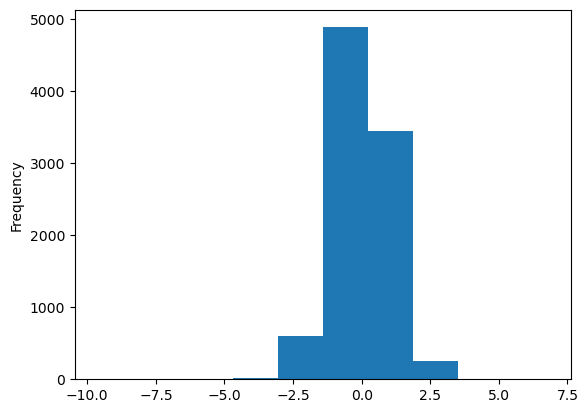

In [29]:
combt['sa_ngd_ca'].plot.hist()

In [30]:
combt['sa_ngd_ca'].describe()

count    9.222000e+03
mean    -8.475353e-18
std      1.000054e+00
min     -9.634130e+00
25%     -6.407275e-01
50%     -1.586307e-02
75%      6.277594e-01
max      6.797902e+00
Name: sa_ngd_ca, dtype: float64

### Generate formulas for lavaan

In [63]:
' , '.join([c for c in threat.columns if c.startswith('F') and '.' not in c])

'FconP1 , FconP2 , FconP3 , FconP4 , FconP5 , FconP6 , FconP7 , FconP8 , FconP9'

In [80]:
' + '.join([c for c in combt.columns if c.startswith('site')])

'site01 + site02 + site03 + site04 + site05 + site06 + site07 + site08 + site09 + site10 + site11 + site12 + site13 + site14 + site15 + site16 + site17 + site18 + site19 + site20 + site21 + site22'

In [87]:
', '.join(['"'+c+'"' for c in combt.columns if c.startswith('site') or c.startswith('Sex') or c.startswith('rel')])

'"Sex", "rel_family_id", "site01", "site02", "site03", "site04", "site05", "site06", "site07", "site08", "site09", "site10", "site11", "site12", "site13", "site14", "site15", "site16", "site17", "site18", "site19", "site20", "site21", "site22"'

In [84]:
combt.columns.tolist()

['sa_scs_aalh',
 'sa_scs_aarh',
 'sa_scs_aglh',
 'sa_scs_agrh',
 'sa_scs_bs',
 'sa_scs_cdelh',
 'sa_scs_cderh',
 'sa_scs_crcxlh',
 'sa_scs_crcxrh',
 'sa_scs_hplh',
 'sa_scs_hprh',
 'sa_scs_pllh',
 'sa_scs_plrh',
 'sa_scs_ptlh',
 'sa_scs_ptrh',
 'sa_scs_thplh',
 'sa_scs_thprh',
 'sa_scs_vtdclh',
 'sa_scs_vtdcrh',
 'df_scs_aalh',
 'df_scs_aarh',
 'df_scs_aglh',
 'df_scs_agrh',
 'df_scs_bs',
 'df_scs_cdelh',
 'df_scs_cderh',
 'df_scs_crcxlh',
 'df_scs_crcxrh',
 'df_scs_hplh',
 'df_scs_hprh',
 'df_scs_pllh',
 'df_scs_plrh',
 'df_scs_ptlh',
 'df_scs_ptrh',
 'df_scs_thplh',
 'df_scs_thprh',
 'df_scs_vtdclh',
 'df_scs_vtdcrh',
 'sa_ngd_ad',
 'sa_ngd_cgc',
 'sa_ngd_ca',
 'sa_ngd_dt',
 'sa_ngd_dla',
 'sa_ngd_fo',
 'sa_ngd_n',
 'sa_ngd_rspltp',
 'sa_ngd_sa',
 'sa_ngd_smh',
 'sa_ngd_smm',
 'sa_ngd_vta',
 'sa_ngd_vs',
 'sa_ngd_body',
 'src_subject_id',
 'newThrt',
 'newThrt_sq',
 'FamCon1',
 'Sex',
 'SES',
 'rel_family_id',
 'site01',
 'site02',
 'site03',
 'site04',
 'site05',
 'site06',
 'site07

In [61]:
prod_ind = [c for c in threat.columns if c.startswith('Fc') and c.endswith('mc') and '7' not in c and '9' not in c]
' + '.join(prod_ind)

'FconP1.FconP2_mc + FconP1.FconP3_mc + FconP1.FconP4_mc + FconP1.FconP5_mc + FconP1.FconP6_mc + FconP1.FconP8_mc + FconP2.FconP3_mc + FconP2.FconP4_mc + FconP2.FconP5_mc + FconP2.FconP6_mc + FconP2.FconP8_mc + FconP3.FconP4_mc + FconP3.FconP5_mc + FconP3.FconP6_mc + FconP3.FconP8_mc + FconP4.FconP5_mc + FconP4.FconP6_mc + FconP4.FconP8_mc + FconP5.FconP6_mc + FconP5.FconP8_mc + FconP6.FconP8_mc'

In [109]:
output

[('FconP1', 'FconP2'),
 ('FconP1', 'FconP3'),
 ('FconP1', 'FconP4'),
 ('FconP1', 'FconP5'),
 ('FconP1', 'FconP6'),
 ('FconP1', 'FconP8'),
 ('FconP2', 'FconP3'),
 ('FconP2', 'FconP4'),
 ('FconP2', 'FconP5'),
 ('FconP2', 'FconP6'),
 ('FconP2', 'FconP8'),
 ('FconP3', 'FconP4'),
 ('FconP3', 'FconP5'),
 ('FconP3', 'FconP6'),
 ('FconP3', 'FconP8'),
 ('FconP4', 'FconP5'),
 ('FconP4', 'FconP6'),
 ('FconP4', 'FconP8'),
 ('FconP5', 'FconP6'),
 ('FconP5', 'FconP8'),
 ('FconP6', 'FconP8')]

In [66]:
len(output)

36

In [21]:
for tup in output:
    print(' ~~ '.join(tup))

FconP1 ~~ FconP2
FconP1 ~~ FconP3
FconP1 ~~ FconP4
FconP1 ~~ FconP5
FconP1 ~~ FconP6
FconP1 ~~ FconP7
FconP1 ~~ FconP8
FconP1 ~~ FconP9
FconP2 ~~ FconP3
FconP2 ~~ FconP4
FconP2 ~~ FconP5
FconP2 ~~ FconP6
FconP2 ~~ FconP7
FconP2 ~~ FconP8
FconP2 ~~ FconP9
FconP3 ~~ FconP4
FconP3 ~~ FconP5
FconP3 ~~ FconP6
FconP3 ~~ FconP7
FconP3 ~~ FconP8
FconP3 ~~ FconP9
FconP4 ~~ FconP5
FconP4 ~~ FconP6
FconP4 ~~ FconP7
FconP4 ~~ FconP8
FconP4 ~~ FconP9
FconP5 ~~ FconP6
FconP5 ~~ FconP7
FconP5 ~~ FconP8
FconP5 ~~ FconP9
FconP6 ~~ FconP7
FconP6 ~~ FconP8
FconP6 ~~ FconP9
FconP7 ~~ FconP8
FconP7 ~~ FconP9
FconP8 ~~ FconP9


In [23]:
pairs = list(combinations(prod_ind, 2))
for tup in pairs:
    print(' ~~ '.join(tup))

FconP1.FconP2_mc ~~ FconP1.FconP3_mc
FconP1.FconP2_mc ~~ FconP1.FconP4_mc
FconP1.FconP2_mc ~~ FconP1.FconP5_mc
FconP1.FconP2_mc ~~ FconP1.FconP6_mc
FconP1.FconP2_mc ~~ FconP1.FconP7_mc
FconP1.FconP2_mc ~~ FconP1.FconP8_mc
FconP1.FconP2_mc ~~ FconP1.FconP9_mc
FconP1.FconP2_mc ~~ FconP2.FconP3_mc
FconP1.FconP2_mc ~~ FconP2.FconP4_mc
FconP1.FconP2_mc ~~ FconP2.FconP5_mc
FconP1.FconP2_mc ~~ FconP2.FconP6_mc
FconP1.FconP2_mc ~~ FconP2.FconP7_mc
FconP1.FconP2_mc ~~ FconP2.FconP8_mc
FconP1.FconP2_mc ~~ FconP2.FconP9_mc
FconP1.FconP2_mc ~~ FconP3.FconP4_mc
FconP1.FconP2_mc ~~ FconP3.FconP5_mc
FconP1.FconP2_mc ~~ FconP3.FconP6_mc
FconP1.FconP2_mc ~~ FconP3.FconP7_mc
FconP1.FconP2_mc ~~ FconP3.FconP8_mc
FconP1.FconP2_mc ~~ FconP3.FconP9_mc
FconP1.FconP2_mc ~~ FconP4.FconP5_mc
FconP1.FconP2_mc ~~ FconP4.FconP6_mc
FconP1.FconP2_mc ~~ FconP4.FconP7_mc
FconP1.FconP2_mc ~~ FconP4.FconP8_mc
FconP1.FconP2_mc ~~ FconP4.FconP9_mc
FconP1.FconP2_mc ~~ FconP5.FconP6_mc
FconP1.FconP2_mc ~~ FconP5.FconP7_mc
F

In [67]:
', '.join(['"'+c+'"' for c in threat.columns if c.startswith('F') and '.' not in c])

'"FconP1", "FconP2", "FconP3", "FconP4", "FconP5", "FconP6", "FconP7", "FconP8", "FconP9"'

In [68]:
prod_ind = [c[:-3] + '.1' for c in threat.columns if c.startswith('Fc') and c.endswith('mc') and '7' not in c and '9' not in c]
' + '.join(prod_ind)

'FconP1.FconP2.1 + FconP1.FconP3.1 + FconP1.FconP4.1 + FconP1.FconP5.1 + FconP1.FconP6.1 + FconP1.FconP8.1 + FconP2.FconP3.1 + FconP2.FconP4.1 + FconP2.FconP5.1 + FconP2.FconP6.1 + FconP2.FconP8.1 + FconP3.FconP4.1 + FconP3.FconP5.1 + FconP3.FconP6.1 + FconP3.FconP8.1 + FconP4.FconP5.1 + FconP4.FconP6.1 + FconP4.FconP8.1 + FconP5.FconP6.1 + FconP5.FconP8.1 + FconP6.FconP8.1'

In [56]:
', '.join(['"'+c+'"' for c in ders.columns if 'ders' in c])

'"ders_attn_awareness_p", "ders_clear_feelings_p", "ders_emotion_overwhelm_p", "ders_feelings_attentive_p", "ders_feelings_care_p", "ders_feelings_know_p", "ders_p_select_language___1", "ders_upset_ack_p", "ders_upset_angry_p", "ders_upset_ashamed_p", "ders_upset_behavior_control_p", "ders_upset_behavior_p", "ders_upset_better_p", "ders_upset_concentrate_p", "ders_upset_control_p", "ders_upset_depressed_p", "ders_upset_difficulty_p", "ders_upset_embarrassed_p", "ders_upset_emotion_overwhelm_p", "ders_upset_esteem_p", "ders_upset_feel_better_p", "ders_upset_fixation_p", "ders_upset_focus_p", "ders_upset_guilty_p", "ders_upset_irritation_p", "ders_upset_long_time_better_p", "ders_upset_lose_control_p", "ders_upset_out_control_p", "ders_upset_time_p", "ders_upset_weak_p", "ders_total_score", "ders_impulse_score", "ders_nonaccept_score", "ders_goals_score", "ders_awareness_score", "ders_aware_clar_score", "Sders_attn_awareness_p", "Sders_clear_feelings_p", "Sders_emotion_overwhelm_p", "Sde

In [61]:
da = 'ders_attn_awareness_p + ders_clear_feelings_p + ders_feelings_attentive_p + ders_feelings_care_p + ders_feelings_know_p + ders_upset_ack_p + ders_upset_better_p'
aware = da.split(' + ')


In [62]:
', '.join(['"'+c+'"' for c in aware])

'"ders_attn_awareness_p", "ders_clear_feelings_p", "ders_feelings_attentive_p", "ders_feelings_care_p", "ders_feelings_know_p", "ders_upset_ack_p", "ders_upset_better_p"'

### For WIDE data

In [ ]:
sdict = {'src_subject_id': 'subID', 'scanID_yr1': 'scanID', 'rel_family_id_yr1': 'famID', 'tfmri_nback_all_meanmotion_yr1': 'MotT1', 'tfmri_nback_all_meanmotion_yr2': 'MotT5', 'sa_ngd_ca_yr1': 'SaCParT1', 'sa_ngd_ca_yr2': 'SaCParT5', 'ders_aware_clar_score': 'AwareER',
         'tfmri_nback_all_224_yr1': 'AmygL1',
         'tfmri_nback_all_238_yr1': 'AmygR1',
         'tfmri_nback_all_227_yr1': 'VnldcL1',
         'tfmri_nback_all_240_yr1': 'VnldcR1',
         'tfmri_nback_all_216_yr1': 'ThalL1',
         'tfmri_nback_all_233_yr1': 'ThalR1',
         'tfabwdp_1083_yr1': 'aInslaL1',
         'tfabwdp_1083_yr1': 'aInslaR1',
         'tfmri_nback_all_224_yr2': 'AmygL5',
         'tfmri_nback_all_238_yr2': 'AmygR5',
         'tfmri_nback_all_227_yr2': 'VnldcL5',
         'tfmri_nback_all_240_yr2': 'VnldcR5',
         'tfmri_nback_all_216_yr2': 'ThalL5',
         'tfmri_nback_all_233_yr2': 'ThalR5',
         'tfabwdp_1083_yr2': 'aInslaL5',
         'tfabwdp_1083_yr2': 'aInslaR5'
        }